# 4 Data curation and visualisation

## Importing libraries

In [2]:
from brightway2 import *
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python

import matplotlib.pyplot as plt
from scipy.stats import rankdata
import string
import pickle 
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
from matplotlib.ticker import ScalarFormatter

## Projects setting

In [3]:
projects.set_current('pLCA_RegAC_results_and_visualisation')

## ImpactWorld+ import

In [11]:
# Import the specified BW2Package for the LCIA method IMPACTWorld+ file from the given path or import it to the same file location as this notebook
package_world_plus= BW2Package.import_file("Brightway_IW_damage_1_46_and_midpoint_1_28.bw2package")

# The water use method needs to be updated due to the fact that it was wrongly created.
# Filter the methods list to find the desired method for 'IMPACTWorld+ (Default_Recommended_Midpoint 1.28)'.
# Then, load the method and its characterization factors into the WS_lst variable.
IWP_mid = [m for m in methods if 'IMPACTWorld+ (Default_Recommended_Midpoint 1.28)' in m[0]]
WS = Method(IWP_mid[9])
WS_lst = WS.load()

# Define and remove certain characterization factors (CF) from the WS_lst.
ex_CF = (('biosphere3', '2404b41a-2eed-4e9d-8ab6-783946fdf5d6'), -42.95353086694035)
ex_CF_ocean = (('biosphere3', '4f0f15b3-b227-4cdc-b0b3-6412d55695d5'), 0)
WS_lst.remove(ex_CF)
WS_lst.remove(ex_CF_ocean)

# Define a new characterization factor and add it to the WS_lst.
new_CF = (('biosphere3', '8c1494a5-4987-4715-aa2d-1908c495f4eb'), 42.95353086694035)
WS_lst.append(new_CF)

# Create a new Method instance for the updated 'Water scarcity' method.
# Register the new method and write the updated characterization factors to it.
new_WS = Method(('IMPACTWorld+ (Default_Recommended_Midpoint 1.28)', 'Water scarcity'))
new_WS.register()
new_WS.write(WS_lst)

Assigning methods and units required for axis labels in visualisations

In [12]:
IWP_mid = [m for m in methods if 'IMPACTWorld+ (Default_Recommended_Midpoint 1.28)' in m[0]]
units_IWP_mid=['kg CO2eq.','kg CO2eq.','MJ dep.','kg dep.', 'kg NMVOCeq.','kg CFC-11eq.','CTUe','CTUh','CTUh','m3eq.','kg SO2eq.','kg SO2eq.','kg PO4eq.','kg Neq.', 'm2eq.', 'm2eq*yr.', 'kg PM2.5eq.', 'Bq C14eq.']

In [13]:
IWP_end = [m for m in methods if 'IMPACTWorld+ (Default_Recommended_Damage 1.46)' in m[0]]

## Data Curation

### Deterministic results
In this section we import the dataframes with deterministic results established in the "Calculation_of_deterministic_results" notebooks

#### Midpoint
opening pickles with deterministic midpoint dataframes

In [14]:
#Typical mission

with open(f"deterministic_midpoint_typ_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_typ_2030=var
deterministic_midpoint_typ_2030=deterministic_midpoint_typ_2030.T.reset_index().T.reset_index(drop=False)

with open(f"deterministic_midpoint_typ_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_typ_2040=var
deterministic_midpoint_typ_2040=deterministic_midpoint_typ_2040.T.reset_index().T.reset_index(drop=False)

with open(f"deterministic_midpoint_typ_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_typ_2050=var
deterministic_midpoint_typ_2050=deterministic_midpoint_typ_2050.T.reset_index().T.reset_index(drop=False)

#Design mission

with open(f"deterministic_midpoint_des_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_des_2030=var
deterministic_midpoint_des_2030=deterministic_midpoint_des_2030.T.reset_index().T.reset_index(drop=False)

with open(f"deterministic_midpoint_des_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_des_2040=var
deterministic_midpoint_des_2040=deterministic_midpoint_des_2040.T.reset_index().T.reset_index(drop=False)

with open(f"deterministic_midpoint_des_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_midpoint_des_2050=var
deterministic_midpoint_des_2050=deterministic_midpoint_des_2050.T.reset_index().T.reset_index(drop=False)
   
# ENDPOINT
#Typical mission

with open(f"deterministic_endpoint_typ_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2030=var
deterministic_endpoint_typ_2030=deterministic_endpoint_typ_2030.T.reset_index().T.reset_index(drop=False)
   

with open(f"deterministic_endpoint_typ_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2040=var
deterministic_endpoint_typ_2040=deterministic_endpoint_typ_2040.T.reset_index().T.reset_index(drop=False)
   

with open(f"deterministic_endpoint_typ_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2050=var
deterministic_endpoint_typ_2050=deterministic_endpoint_typ_2050[0].T.reset_index().T.reset_index(drop=False)   

#Design mission

with open(f"deterministic_endpoint_des_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2030=var
deterministic_endpoint_des_2030=deterministic_endpoint_des_2030.T.reset_index().T.reset_index(drop=False)
   

with open(f"deterministic_endpoint_des_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2040=var
deterministic_endpoint_des_2040=deterministic_endpoint_des_2040.T.reset_index().T.reset_index(drop=False)
   

with open(f"deterministic_endpoint_des_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2050=var
deterministic_endpoint_des_2050=deterministic_endpoint_des_2050[0].T.reset_index().T.reset_index(drop=False)
   

# create a excel writer object
with pd.ExcelWriter("deterministic.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    deterministic_midpoint_typ_2030.to_excel(writer, sheet_name="deterministic_midpoint_typ_2030", index=False)
    deterministic_midpoint_typ_2040.to_excel(writer, sheet_name="deterministic_midpoint_typ_2040", index=False)
    deterministic_midpoint_typ_2050.to_excel(writer, sheet_name="deterministic_midpoint_typ_2050", index=False)
    deterministic_midpoint_des_2030.to_excel(writer, sheet_name="deterministic_midpoint_des_2030", index=False)
    deterministic_midpoint_des_2040.to_excel(writer, sheet_name="deterministic_midpoint_des_2040", index=False)
    deterministic_midpoint_des_2050.to_excel(writer, sheet_name="deterministic_midpoint_des_2050", index=False)
    deterministic_endpoint_typ_2030.to_excel(writer, sheet_name="deterministic_endpoint_typ_2030", index=False)
    deterministic_endpoint_typ_2040.to_excel(writer, sheet_name="deterministic_endpoint_typ_2040", index=False)
    deterministic_endpoint_typ_2050.to_excel(writer, sheet_name="deterministic_endpoint_typ_2050", index=False)
    deterministic_endpoint_des_2030.to_excel(writer, sheet_name="deterministic_endpoint_des_2030", index=False)
    deterministic_endpoint_des_2040.to_excel(writer, sheet_name="deterministic_endpoint_des_2040", index=False)
    deterministic_endpoint_des_2050.to_excel(writer, sheet_name="deterministic_endpoint_des_2050", index=False)

#### Endpoint
opening pickles with deterministic endpoint dataframes

In [15]:
#Typical mission

with open(f"deterministic_endpoint_typ_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2030=var

with open(f"deterministic_endpoint_typ_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2040=var

with open(f"deterministic_endpoint_typ_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_typ_2050=var

#Design mission

with open(f"deterministic_endpoint_des_2030.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2030=var

with open(f"deterministic_endpoint_des_2040.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2040=var

with open(f"deterministic_endpoint_des_2050.pkl", "rb") as f:
    var = pickle.load(f)
deterministic_endpoint_des_2050=var


#### Life cycle stages contribution

In [16]:
with open(f"endpoint_stages_contribution_HH_2030.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_HH_2030=var
endpoint_stages_contribution_HH_2030
endpoint_stages_contribution_HH_2030['H2']=0
endpoint_stages_contribution_HH_2030['Year']='2030'


with open(f"endpoint_stages_contribution_HH_2040.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_HH_2040=var
endpoint_stages_contribution_HH_2040
endpoint_stages_contribution_HH_2040['Year']='2040'

with open(f"endpoint_stages_contribution_HH_2050.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_HH_2050=var
endpoint_stages_contribution_HH_2050
endpoint_stages_contribution_HH_2050['Year']='2050'

with open(f"endpoint_stages_contribution_EQ_2030.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_EQ_2030=var
endpoint_stages_contribution_EQ_2030
endpoint_stages_contribution_EQ_2030['H2']=0
endpoint_stages_contribution_EQ_2030['Year']='2030'


with open(f"endpoint_stages_contribution_EQ_2040.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_EQ_2040=var
endpoint_stages_contribution_EQ_2040
endpoint_stages_contribution_EQ_2040['Year']='2040'

with open(f"endpoint_stages_contribution_EQ_2050.pkl", "rb") as f:
    var = pickle.load(f)
endpoint_stages_contribution_EQ_2050=var
endpoint_stages_contribution_EQ_2050
endpoint_stages_contribution_EQ_2050['Year']='2050'


### Monte Carlo Results
In this section we import the results of the Monte Carlo simulations established in the "Calculation_of_probabilistic_results" notebooks, and rearange them into dataframes

#### Function definitions
creating functions that rearange Monte Carlo results into dataframes

In [17]:

def Monte_Carlo_dataframing(names_year, df_results,i,j,a,b,level,n_iterations):

    for k in range(len(names_year)):
        name_split = str(list(names_year.keys())[k]).split('_')
        #Mission
        df_results.loc[a:b, "Mission"]=name_split[0]
        #Configuration
        df_results.loc[a:b, "Configuration"]=name_split[1]
        #Fuel
        df_results.loc[a:b, "Fuel"]=name_split[2]
        #Scenario
        df_results.loc[a:b, "Scenario"]=name_split[3]
        #Year
        df_results.loc[a:b, "Year"]=name_split[4]
        
        #Impact Level 
        #Midpoint
        if level =='midpoint':
            # 18 categories so 18*n_iteration results
            T=(18*n_iterations)-1
          #Categories and Units
            for u in range(18):
                df_results.loc[i:j, "Unit"]=units_IWP_mid[u]
                df_results.loc[i:j, "Category"]=str(IWP_mid[u][1])
                df_results.loc[i:j, "Impact Level"]='Midpoint'
                i=j+1
                j=i+(n_iterations-1)
                
        #Endpoint    
        if level=='endpoint':
            # 27 categories so 27*n_iteration results
            T=27*n_iterations-1
            #Categories
            for v in range(27):
                df_results.loc[i:j, "Category"]=str(IWP_end[v][1])
                df_results.loc[i:j, "Impact Level"]='Endpoint'

                #Units
                if df_results.loc[i:j, "Category"].isin(['Climate change, human health, short term', "Climate change, human health, long term", 'Water availability, human health', 'Photochemical oxidant formation', 'Ionizing radiation, human health', 'Ozone layer depletion', 'Human toxicity cancer, short term', 'Human toxicity cancer, long term', 'Human toxicity non-cancer, short term', 'Human toxicity non-cancer, long term', 'Particulate matter formation']).sum():
                    df_results.loc[i:j, "Unit"]='DALY'       
                else:
                    df_results.loc[i:j, "Unit"]='PDF*m2*year'
                i=j+1
                j=i+(n_iterations-1)
        
        #Values
        df_results.loc[a:b, "Value"]=np.reshape(names_year[list(names_year.keys())[k]],(T+1))
        a=b+1
        b=a+T


    return i,j,a,b
    
       



In [18]:
#summing function for short term damages endpoint

def Monte_Carlo_endpoint_damage_sums_ST(MC_result_aircraft_endpoint, name, n_iterations):
    endpoint= pd.DataFrame(index=[index[1] for index in IWP_end], columns=range(n_iterations))
    endpoint.loc[:]=MC_result_aircraft_endpoint

    cols_HH_ST = ["Climate change, human health, short term",'Water availability, human health','Photochemical oxidant formation','Ionizing radiation, human health','Ozone layer depletion','Human toxicity cancer, short term','Human toxicity non-cancer, short term','Particulate matter formation']
    cols_EQ_ST =['Climate change, ecosystem quality, short term','Marine acidification, short term','Land occupation, biodiversity','Water availability, freshwater ecosystem','Water availability, terrestrial ecosystem','Thermally polluted water','Freshwater ecotoxicity, short term','Freshwater acidification','Terrestrial acidification','Freshwater eutrophication','Marine eutrophication','Land transformation, biodiversity','Ionizing radiation, ecosystem quality']    #11 categories in HH
    
    # HH categories
    endpoint_sum_HH=endpoint.loc[cols_HH_ST]
    endpoint_sum_HH

    #16 categories in EQ
    endpoint_sum_EQ=endpoint.loc[cols_EQ_ST]
    endpoint_sum_EQ

    sum_EQ=endpoint_sum_EQ.sum(0)
    sum_HH=endpoint_sum_HH.sum(0)
    
    #pd.DataFrame([sum_EQ, sum_HH], columns=["EQ", "HH"])
    df = pd.DataFrame(sum_EQ, columns=["EQ"]).join(sum_HH.rename("HH")).melt(var_name="Damage", value_name="Value")
    df["Configuration"] = name
    return df


 

#### Pickle import

##### Midpoint

###### Typical Mission 

In [19]:
#opening pickeled MC results for 2030 typical

with open(f"MC_typical_midpoint_2030.pkl", "rb") as f:
    var_typical_midpoint_2030 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2030,r_typ_aircraft_conv_kero_Base_2030,r_typ_aircraft_conv_kero_PkBudg500_2030,r_typ_aircraft_GT_bat_kero_NDC_2030, r_typ_aircraft_GT_bat_kero_Base_2030,r_typ_aircraft_GT_bat_kero_PkBudg500_2030,r_typ_aircraft_conv_AAF_NDC_2030,r_typ_aircraft_conv_AAF_Base_2030,r_typ_aircraft_conv_AAF_PkBudg500_2030,r_typ_aircraft_GT_bat_AAF_NDC_2030,r_typ_aircraft_GT_bat_AAF_Base_2030,r_typ_aircraft_GT_bat_AAF_PkBudg500_2030,r_typ_aircraft_conv_ILUC_NDC_2030,r_typ_aircraft_GT_bat_ILUC_NDC_2030= var_typical_midpoint_2030

names_typ_midpoint_2030={'typical_conventional_kerosene_NDC_2030':r_typ_aircraft_conv_kero_NDC_2030,
            'typical_conventional_kerosene_Base_2030':r_typ_aircraft_conv_kero_Base_2030,
            'typical_conventional_kerosene_PkBudg500_2030':r_typ_aircraft_conv_kero_PkBudg500_2030,
            'typical_GTbat_kerosene_NDC_2030':r_typ_aircraft_GT_bat_kero_NDC_2030,
            'typical_GTbat_kerosene_Base_2030':r_typ_aircraft_GT_bat_kero_Base_2030,
            'typical_GTbat_kerosene_PkBudg500_2030':r_typ_aircraft_GT_bat_kero_PkBudg500_2030,
            'typical_conventional_AAF_NDC_2030':r_typ_aircraft_conv_AAF_NDC_2030,
            'typical_conventional_AAF_Base_2030':r_typ_aircraft_conv_AAF_Base_2030,
            'typical_conventional_AAF_PkBudg500_2030':r_typ_aircraft_conv_AAF_PkBudg500_2030,
            'typical_GTbat_AAF_NDC_2030':r_typ_aircraft_GT_bat_AAF_NDC_2030,
            'typical_GTbat_AAF_Base_2030':r_typ_aircraft_GT_bat_AAF_Base_2030,
            'typical_GTbat_AAF_PkBudg500_2030':r_typ_aircraft_GT_bat_AAF_PkBudg500_2030,
            'typical_conventional_ILUC_NDC_2030':r_typ_aircraft_conv_ILUC_NDC_2030,
            'typical_GTbat_ILUC_NDC_2030':r_typ_aircraft_GT_bat_ILUC_NDC_2030}

In [117]:
#opening pickeled MC results for 2040 typical

with open(f"MC_typical_midpoint_2040.pkl", "rb") as f:
    var_typical_midpoint_2040 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2040,r_typ_aircraft_conv_kero_Base_2040,r_typ_aircraft_conv_kero_PkBudg500_2040,r_typ_aircraft_GT_bat_kero_NDC_2040,r_typ_aircraft_GT_bat_kero_Base_2040,r_typ_aircraft_GT_bat_kero_PkBudg500_2040,r_typ_aircraft_conv_AAF_NDC_2040,r_typ_aircraft_conv_AAF_Base_2040,r_typ_aircraft_conv_AAF_PkBudg500_2040,r_typ_aircraft_GT_bat_AAF_NDC_2040,r_typ_aircraft_GT_bat_AAF_Base_2040,r_typ_aircraft_GT_bat_AAF_PkBudg500_2040,r_typ_aircraft_PEMFC_bat_NDC_2040,r_typ_aircraft_PEMFC_bat_Base_2040,r_typ_aircraft_PEMFC_bat_PkBudg500_2040,r_typ_aircraft_GT_bat_ILUC_NDC_2040,r_typ_aircraft_conv_ILUC_NDC_2040= var_typical_midpoint_2040

names_typ_midpoint_2040={'typical_conventional_kerosene_NDC_2040':r_typ_aircraft_conv_kero_NDC_2040,
            'typical_conventional_kerosene_Base_2040':r_typ_aircraft_conv_kero_Base_2040,
            'typical_conventional_kerosene_PkBudg500_2040':r_typ_aircraft_conv_kero_PkBudg500_2040,
            'typical_GTbat_kerosene_NDC_2040':r_typ_aircraft_GT_bat_kero_NDC_2040,
            'typical_GTbat_kerosene_Base_2040':r_typ_aircraft_GT_bat_kero_Base_2040,
            'typical_GTbat_kerosene_PkBudg500_2040':r_typ_aircraft_GT_bat_kero_PkBudg500_2040,
            'typical_conventional_AAF_NDC_2040':r_typ_aircraft_conv_AAF_NDC_2040,
            'typical_conventional_AAF_Base_2040':r_typ_aircraft_conv_AAF_Base_2040,
            'typical_conventional_AAF_PkBudg500_2040':r_typ_aircraft_conv_AAF_PkBudg500_2040,
            'typical_GTbat_AAF_NDC_2040':r_typ_aircraft_GT_bat_AAF_NDC_2040,
            'typical_GTbat_AAF_Base_2040':r_typ_aircraft_GT_bat_AAF_Base_2040,
            'typical_GTbat_AAF_PkBudg500_2040':r_typ_aircraft_GT_bat_AAF_PkBudg500_2040,
            'typical_PEMFCbat_h2_NDC_2040':r_typ_aircraft_PEMFC_bat_NDC_2040,
            'typical_PEMFCbat_h2_Base_2040':r_typ_aircraft_PEMFC_bat_Base_2040,
            'typical_PEMFCbat_h2_PkBudg500_2040':r_typ_aircraft_PEMFC_bat_PkBudg500_2040,
            'typical_conventional_ILUC_NDC_2040':r_typ_aircraft_conv_ILUC_NDC_2040,
            'typical_GTbat_ILUC_NDC_2040':r_typ_aircraft_GT_bat_ILUC_NDC_2040}

In [118]:
#opening pickeled MC results for 2050 typical
with open(f"MC_typical_midpoint_2050.pkl", "rb") as f:
        var_typical_midpoint_2050 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2050,r_typ_aircraft_conv_kero_Base_2050,r_typ_aircraft_conv_kero_PkBudg500_2050,r_typ_aircraft_conv_AAF_NDC_2050,r_typ_aircraft_conv_AAF_Base_2050,r_typ_aircraft_conv_AAF_PkBudg500_2050,r_typ_aircraft_PEMFC_bat_NDC_2050,r_typ_aircraft_PEMFC_bat_Base_2050,r_typ_aircraft_PEMFC_bat_PkBudg500_2050,r_typ_aircraft_SOFC_bat_NDC_2050,r_typ_aircraft_SOFC_bat_Base_2050,r_typ_aircraft_SOFC_bat_PkBudg500_2050,r_typ_aircraft_conv_ILUC_NDC_2050=var_typical_midpoint_2050

names_typ_midpoint_2050={'typical_conventional_kerosene_NDC_2050':r_typ_aircraft_conv_kero_NDC_2050,
            'typical_conventional_kerosene_Base_2050':r_typ_aircraft_conv_kero_Base_2050,
            'typical_conventional_kerosene_PkBudg500_2050':r_typ_aircraft_conv_kero_PkBudg500_2050,
            'typical_conventional_AAF_NDC_2050':r_typ_aircraft_conv_AAF_NDC_2050,
            'typical_conventional_AAF_Base_2050':r_typ_aircraft_conv_AAF_Base_2050,
            'typical_conventional_AAF_PkBudg500_2050':r_typ_aircraft_conv_AAF_PkBudg500_2050,
            'typical_PEMFCbat_h2_NDC_2050':r_typ_aircraft_PEMFC_bat_NDC_2050,
            'typical_PEMFCbat_h2_Base_2050':r_typ_aircraft_PEMFC_bat_Base_2050,
            'typical_PEMFCbat_h2_PkBudg500_2050':r_typ_aircraft_PEMFC_bat_PkBudg500_2050,
            'typical_SOFCbat_h2_NDC_2050':r_typ_aircraft_SOFC_bat_NDC_2050,
            'typical_SOFCbat_h2_Base_2050':r_typ_aircraft_SOFC_bat_Base_2050,
            'typical_SOFCbat_h2_PkBudg500_2050':r_typ_aircraft_SOFC_bat_PkBudg500_2050,
            'typical_conventional_ILUC_NDC_2050':r_typ_aircraft_conv_ILUC_NDC_2050,}

###### Design mission 

In [119]:
#opening pickeled MC results for 2030 design

with open(f"MC_design_midpoint_2030.pkl", "rb") as f:
    var_design_midpoint_2030 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2030,r_des_aircraft_conv_kero_Base_2030,r_des_aircraft_conv_kero_PkBudg500_2030,r_des_aircraft_GT_bat_kero_NDC_2030, r_des_aircraft_GT_bat_kero_Base_2030,r_des_aircraft_GT_bat_kero_PkBudg500_2030,r_des_aircraft_conv_AAF_NDC_2030,r_des_aircraft_conv_AAF_Base_2030,r_des_aircraft_conv_AAF_PkBudg500_2030,r_des_aircraft_GT_bat_AAF_NDC_2030,r_des_aircraft_GT_bat_AAF_Base_2030,r_des_aircraft_GT_bat_AAF_PkBudg500_2030,r_des_aircraft_conv_ILUC_NDC_2030,r_des_aircraft_GT_bat_ILUC_NDC_2030= var_design_midpoint_2030

names_des_midpoint_2030={'design_conventional_kerosene_NDC_2030':r_des_aircraft_conv_kero_NDC_2030,
            'design_conventional_kerosene_Base_2030':r_des_aircraft_conv_kero_Base_2030,
            'design_conventional_kerosene_PkBudg500_2030':r_des_aircraft_conv_kero_PkBudg500_2030,
            'design_GTbat_kerosene_NDC_2030':r_des_aircraft_GT_bat_kero_NDC_2030,
            'design_GTbat_kerosene_Base_2030':r_des_aircraft_GT_bat_kero_Base_2030,
            'design_GTbat_kerosene_PkBudg500_2030':r_des_aircraft_GT_bat_kero_PkBudg500_2030,
            'design_conventional_AAF_NDC_2030':r_des_aircraft_conv_AAF_NDC_2030,
            'design_conventional_AAF_Base_2030':r_des_aircraft_conv_AAF_Base_2030,
            'design_conventional_AAF_PkBudg500_2030':r_des_aircraft_conv_AAF_PkBudg500_2030,
            'design_GTbat_AAF_NDC_2030':r_des_aircraft_GT_bat_AAF_NDC_2030,
            'design_GTbat_AAF_Base_2030':r_des_aircraft_GT_bat_AAF_Base_2030,
            'design_GTbat_AAF_PkBudg500_2030':r_des_aircraft_GT_bat_AAF_PkBudg500_2030,
            'design_conventional_ILUC_NDC_2030':r_des_aircraft_conv_ILUC_NDC_2030,
            'design_GTbat_ILUC_NDC_2030':r_des_aircraft_GT_bat_ILUC_NDC_2030}

In [180]:
#opening pickeled MC results for 2040 design

with open(f"MC_design_midpoint_2040.pkl", "rb") as f:
    var_design_midpoint_2040 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2040,r_des_aircraft_conv_kero_Base_2040,r_des_aircraft_conv_kero_PkBudg500_2040,r_des_aircraft_GT_bat_kero_NDC_2040,r_des_aircraft_GT_bat_kero_Base_2040,r_des_aircraft_GT_bat_kero_PkBudg500_2040,r_des_aircraft_conv_AAF_NDC_2040,r_des_aircraft_conv_AAF_Base_2040,r_des_aircraft_conv_AAF_PkBudg500_2040,r_des_aircraft_GT_bat_AAF_NDC_2040,r_des_aircraft_GT_bat_AAF_Base_2040,r_des_aircraft_GT_bat_AAF_PkBudg500_2040,r_des_aircraft_PEMFC_bat_NDC_2040,r_des_aircraft_PEMFC_bat_Base_2040,r_des_aircraft_PEMFC_bat_PkBudg500_2040,r_des_aircraft_GT_bat_ILUC_NDC_2040,r_des_aircraft_conv_ILUC_NDC_2040,= var_design_midpoint_2040

names_des_midpoint_2040={'design_conventional_kerosene_NDC_2040':r_des_aircraft_conv_kero_NDC_2040,
            'design_conventional_kerosene_Base_2040':r_des_aircraft_conv_kero_Base_2040,
            'design_conventional_kerosene_PkBudg500_2040':r_des_aircraft_conv_kero_PkBudg500_2040,
            'design_GTbat_kerosene_NDC_2040':r_des_aircraft_GT_bat_kero_NDC_2040,
            'design_GTbat_kerosene_Base_2040':r_des_aircraft_GT_bat_kero_Base_2040,
            'design_GTbat_kerosene_PkBudg500_2040':r_des_aircraft_GT_bat_kero_PkBudg500_2040,
            'design_conventional_AAF_NDC_2040':r_des_aircraft_conv_AAF_NDC_2040,
            'design_conventional_AAF_Base_2040':r_des_aircraft_conv_AAF_Base_2040,
            'design_conventional_AAF_PkBudg500_2040':r_des_aircraft_conv_AAF_PkBudg500_2040,
            'design_GTbat_AAF_NDC_2040':r_des_aircraft_GT_bat_AAF_NDC_2040,
            'design_GTbat_AAF_Base_2040':r_des_aircraft_GT_bat_AAF_Base_2040,
            'design_GTbat_AAF_PkBudg500_2040':r_des_aircraft_GT_bat_AAF_PkBudg500_2040,
            'design_PEMFCbat_h2_NDC_2040':r_des_aircraft_PEMFC_bat_NDC_2040,
            'design_PEMFCbat_h2_Base_2040':r_des_aircraft_PEMFC_bat_Base_2040,
            'design_PEMFCbat_h2_PkBudg500_2040':r_des_aircraft_PEMFC_bat_PkBudg500_2040,
            'design_conventional_ILUC_NDC_2040':r_des_aircraft_conv_ILUC_NDC_2040,
            'design_GTbat_ILUC_NDC_2040':r_des_aircraft_GT_bat_ILUC_NDC_2040}

In [181]:
#opening pickeled MC results for 2050 design
with open(f"MC_design_midpoint_2050.pkl", "rb") as f:
        var_design_midpoint_2050 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2050,r_des_aircraft_conv_kero_Base_2050,r_des_aircraft_conv_kero_PkBudg500_2050,r_des_aircraft_conv_AAF_NDC_2050,r_des_aircraft_conv_AAF_Base_2050,r_des_aircraft_conv_AAF_PkBudg500_2050,r_des_aircraft_PEMFC_bat_NDC_2050,r_des_aircraft_PEMFC_bat_Base_2050,r_des_aircraft_PEMFC_bat_PkBudg500_2050,r_des_aircraft_SOFC_bat_NDC_2050,r_des_aircraft_SOFC_bat_Base_2050,r_des_aircraft_SOFC_bat_PkBudg500_2050,r_des_aircraft_conv_ILUC_NDC_2050=var_design_midpoint_2050

names_des_midpoint_2050={'design_conventional_kerosene_NDC_2050':r_des_aircraft_conv_kero_NDC_2050,
            'design_conventional_kerosene_Base_2050':r_des_aircraft_conv_kero_Base_2050,
            'design_conventional_kerosene_PkBudg500_2050':r_des_aircraft_conv_kero_PkBudg500_2050,
            'design_conventional_AAF_NDC_2050':r_des_aircraft_conv_AAF_NDC_2050,
            'design_conventional_AAF_Base_2050':r_des_aircraft_conv_AAF_Base_2050,
            'design_conventional_AAF_PkBudg500_2050':r_des_aircraft_conv_AAF_PkBudg500_2050,
            'design_PEMFCbat_h2_NDC_2050':r_des_aircraft_PEMFC_bat_NDC_2050,
            'design_PEMFCbat_h2_Base_2050':r_des_aircraft_PEMFC_bat_Base_2050,
            'design_PEMFCbat_h2_PkBudg500_2050':r_des_aircraft_PEMFC_bat_PkBudg500_2050,
            'design_SOFCbat_h2_NDC_2050':r_des_aircraft_SOFC_bat_NDC_2050,
            'design_SOFCbat_h2_Base_2050':r_des_aircraft_SOFC_bat_Base_2050,
            'design_SOFCbat_h2_PkBudg500_2050':r_des_aircraft_SOFC_bat_PkBudg500_2050,
            'design_conventional_ILUC_NDC_2050':r_des_aircraft_conv_ILUC_NDC_2050}

##### Endpoint

###### Typical mission

In [182]:
#opening pickeled MC results for 2030 typical Endpoint

with open(f"MC_typical_endpoint_2030.pkl", "rb") as f:
    var_typical_endpoint_2030 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2030,r_typ_aircraft_conv_kero_Base_2030,r_typ_aircraft_conv_kero_PkBudg500_2030,r_typ_aircraft_GT_bat_kero_NDC_2030, r_typ_aircraft_GT_bat_kero_Base_2030,r_typ_aircraft_GT_bat_kero_PkBudg500_2030,r_typ_aircraft_conv_AAF_NDC_2030,r_typ_aircraft_conv_AAF_Base_2030,r_typ_aircraft_conv_AAF_PkBudg500_2030,r_typ_aircraft_GT_bat_AAF_NDC_2030,r_typ_aircraft_GT_bat_AAF_Base_2030,r_typ_aircraft_GT_bat_AAF_PkBudg500_2030,r_typ_aircraft_conv_ILUC_NDC_2030,r_typ_aircraft_GT_bat_ILUC_NDC_2030= var_typical_endpoint_2030

names_typ_endpoint_2030={'typical_conventional_kerosene_NDC_2030':r_typ_aircraft_conv_kero_NDC_2030,
            'typical_conventional_kerosene_Base_2030':r_typ_aircraft_conv_kero_Base_2030,
            'typical_conventional_kerosene_PkBudg500_2030':r_typ_aircraft_conv_kero_PkBudg500_2030,
            'typical_GTbat_kerosene_NDC_2030':r_typ_aircraft_GT_bat_kero_NDC_2030,
            'typical_GTbat_kerosene_Base_2030':r_typ_aircraft_GT_bat_kero_Base_2030,
            'typical_GTbat_kerosene_PkBudg500_2030':r_typ_aircraft_GT_bat_kero_PkBudg500_2030,
            'typical_conventional_AAF_NDC_2030':r_typ_aircraft_conv_AAF_NDC_2030,
            'typical_conventional_AAF_Base_2030':r_typ_aircraft_conv_AAF_Base_2030,
            'typical_conventional_AAF_PkBudg500_2030':r_typ_aircraft_conv_AAF_PkBudg500_2030,
            'typical_GTbat_AAF_NDC_2030':r_typ_aircraft_GT_bat_AAF_NDC_2030,
            'typical_GTbat_AAF_Base_2030':r_typ_aircraft_GT_bat_AAF_Base_2030,
            'typical_GTbat_AAF_PkBudg500_2030':r_typ_aircraft_GT_bat_AAF_PkBudg500_2030,
            'typical_conventional_ILUC_NDC_2030':r_typ_aircraft_conv_ILUC_NDC_2030,
            'typical_GTbat_ILUC_NDC_2030':r_typ_aircraft_GT_bat_ILUC_NDC_2030}


In [183]:
#opening pickeled MC results for 2040 typical

with open(f"MC_typical_endpoint_2040.pkl", "rb") as f:
    var_typical_endpoint_2040 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2040,r_typ_aircraft_conv_kero_Base_2040,r_typ_aircraft_conv_kero_PkBudg500_2040,r_typ_aircraft_GT_bat_kero_NDC_2040,r_typ_aircraft_GT_bat_kero_Base_2040,r_typ_aircraft_GT_bat_kero_PkBudg500_2040,r_typ_aircraft_conv_AAF_NDC_2040,r_typ_aircraft_conv_AAF_Base_2040,r_typ_aircraft_conv_AAF_PkBudg500_2040,r_typ_aircraft_GT_bat_AAF_NDC_2040,r_typ_aircraft_GT_bat_AAF_Base_2040,r_typ_aircraft_GT_bat_AAF_PkBudg500_2040,r_typ_aircraft_PEMFC_bat_NDC_2040,r_typ_aircraft_PEMFC_bat_Base_2040,r_typ_aircraft_PEMFC_bat_PkBudg500_2040,r_typ_aircraft_GT_bat_ILUC_NDC_2040,r_typ_aircraft_conv_ILUC_NDC_2040= var_typical_endpoint_2040

names_typ_endpoint_2040={'typical_conventional_kerosene_NDC_2040':r_typ_aircraft_conv_kero_NDC_2040,
                'typical_conventional_kerosene_Base_2040':r_typ_aircraft_conv_kero_Base_2040,
                'typical_conventional_kerosene_PkBudg500_2040':r_typ_aircraft_conv_kero_PkBudg500_2040,
                'typical_GTbat_kerosene_NDC_2040':r_typ_aircraft_GT_bat_kero_NDC_2040,
                'typical_GTbat_kerosene_Base_2040':r_typ_aircraft_GT_bat_kero_Base_2040,
                'typical_GTbat_kerosene_PkBudg500_2040':r_typ_aircraft_GT_bat_kero_PkBudg500_2040,
                'typical_conventional_AAF_NDC_2040':r_typ_aircraft_conv_AAF_NDC_2040,
                'typical_conventional_AAF_Base_2040':r_typ_aircraft_conv_AAF_Base_2040,
                'typical_conventional_AAF_PkBudg500_2040':r_typ_aircraft_conv_AAF_PkBudg500_2040,
                'typical_GTbat_AAF_NDC_2040':r_typ_aircraft_GT_bat_AAF_NDC_2040,
                'typical_GTbat_AAF_Base_2040':r_typ_aircraft_GT_bat_AAF_Base_2040,
                'typical_GTbat_AAF_PkBudg500_2040':r_typ_aircraft_GT_bat_AAF_PkBudg500_2040,
                'typical_PEMFCbat_h2_NDC_2040':r_typ_aircraft_PEMFC_bat_NDC_2040,
                'typical_PEMFCbat_h2_Base_2040':r_typ_aircraft_PEMFC_bat_Base_2040,
                'typical_PEMFCbat_h2_PkBudg500_2040':r_typ_aircraft_PEMFC_bat_PkBudg500_2040,
                'typical_conventional_ILUC_NDC_2040':r_typ_aircraft_conv_ILUC_NDC_2040,
                'typical_GTbat_ILUC_NDC_2040':r_typ_aircraft_GT_bat_ILUC_NDC_2040}

In [184]:
#opening pickeled MC results for 2050 typical
with open(f"MC_typical_endpoint_2050.pkl", "rb") as f:
        var_typical_endpoint_2050 = pickle.load(f)
r_typ_aircraft_conv_kero_NDC_2050,r_typ_aircraft_conv_kero_Base_2050,r_typ_aircraft_conv_kero_PkBudg500_2050,r_typ_aircraft_conv_AAF_NDC_2050,r_typ_aircraft_conv_AAF_Base_2050,r_typ_aircraft_conv_AAF_PkBudg500_2050,r_typ_aircraft_PEMFC_bat_NDC_2050,r_typ_aircraft_PEMFC_bat_Base_2050,r_typ_aircraft_PEMFC_bat_PkBudg500_2050,r_typ_aircraft_SOFC_bat_NDC_2050,r_typ_aircraft_SOFC_bat_Base_2050,r_typ_aircraft_SOFC_bat_PkBudg500_2050,r_typ_aircraft_conv_ILUC_NDC_2050=var_typical_endpoint_2050

names_typ_endpoint_2050={'typical_conventional_kerosene_NDC_2050':r_typ_aircraft_conv_kero_NDC_2050,
            'typical_conventional_kerosene_Base_2050':r_typ_aircraft_conv_kero_Base_2050,
            'typical_conventional_kerosene_PkBudg500_2050':r_typ_aircraft_conv_kero_PkBudg500_2050,
            'typical_conventional_AAF_NDC_2050':r_typ_aircraft_conv_AAF_NDC_2050,
            'typical_conventional_AAF_Base_2050':r_typ_aircraft_conv_AAF_Base_2050,
            'typical_conventional_AAF_PkBudg500_2050':r_typ_aircraft_conv_AAF_PkBudg500_2050,
            'typical_PEMFCbat_h2_NDC_2050':r_typ_aircraft_PEMFC_bat_NDC_2050,
            'typical_PEMFCbat_h2_Base_2050':r_typ_aircraft_PEMFC_bat_Base_2050,
            'typical_PEMFCbat_h2_PkBudg500_2050':r_typ_aircraft_PEMFC_bat_PkBudg500_2050,
            'typical_SOFCbat_h2_NDC_2050':r_typ_aircraft_SOFC_bat_NDC_2050,
            'typical_SOFCbat_h2_Base_2050':r_typ_aircraft_SOFC_bat_Base_2050,
            'typical_SOFCbat_h2_PkBudg500_2050':r_typ_aircraft_SOFC_bat_PkBudg500_2050,
            'typical_conventional_ILUC_NDC_2050':r_typ_aircraft_conv_ILUC_NDC_2050}

###### Design mission 

In [185]:
#opening pickeled MC results for 2030 design Endpoint

with open(f"MC_design_endpoint_2030.pkl", "rb") as f:
    var_design_endpoint_2030 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2030,r_des_aircraft_conv_kero_Base_2030,r_des_aircraft_conv_kero_PkBudg500_2030,r_des_aircraft_GT_bat_kero_NDC_2030, r_des_aircraft_GT_bat_kero_Base_2030,r_des_aircraft_GT_bat_kero_PkBudg500_2030,r_des_aircraft_conv_AAF_NDC_2030,r_des_aircraft_conv_AAF_Base_2030,r_des_aircraft_conv_AAF_PkBudg500_2030,r_des_aircraft_GT_bat_AAF_NDC_2030,r_des_aircraft_GT_bat_AAF_Base_2030,r_des_aircraft_GT_bat_AAF_PkBudg500_2030,r_des_aircraft_conv_ILUC_NDC_2030,r_des_aircraft_GT_bat_ILUC_NDC_2030= var_design_endpoint_2030

names_des_endpoint_2030={'design_conventional_kerosene_NDC_2030':r_des_aircraft_conv_kero_NDC_2030,
            'design_conventional_kerosene_Base_2030':r_des_aircraft_conv_kero_Base_2030,
            'design_conventional_kerosene_PkBudg500_2030':r_des_aircraft_conv_kero_PkBudg500_2030,
            'design_GTbat_kerosene_NDC_2030':r_des_aircraft_GT_bat_kero_NDC_2030,
            'design_GTbat_kerosene_Base_2030':r_des_aircraft_GT_bat_kero_Base_2030,
            'design_GTbat_kerosene_PkBudg500_2030':r_des_aircraft_GT_bat_kero_PkBudg500_2030,
            'design_conventional_AAF_NDC_2030':r_des_aircraft_conv_AAF_NDC_2030,
            'design_conventional_AAF_Base_2030':r_des_aircraft_conv_AAF_Base_2030,
            'design_conventional_AAF_PkBudg500_2030':r_des_aircraft_conv_AAF_PkBudg500_2030,
            'design_GTbat_AAF_NDC_2030':r_des_aircraft_GT_bat_AAF_NDC_2030,
            'design_GTbat_AAF_Base_2030':r_des_aircraft_GT_bat_AAF_Base_2030,
            'design_GTbat_AAF_PkBudg500_2030':r_des_aircraft_GT_bat_AAF_PkBudg500_2030,
            'design_conventional_ILUC_NDC_2030':r_des_aircraft_conv_ILUC_NDC_2030,
            'design_GTbat_ILUC_NDC_2030':r_des_aircraft_GT_bat_ILUC_NDC_2030}


In [186]:
#opening pickeled MC results for 2040 design

with open(f"MC_design_endpoint_2040.pkl", "rb") as f:
    var_design_endpoint_2040 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2040,r_des_aircraft_conv_kero_Base_2040,r_des_aircraft_conv_kero_PkBudg500_2040,r_des_aircraft_GT_bat_kero_NDC_2040,r_des_aircraft_GT_bat_kero_Base_2040,r_des_aircraft_GT_bat_kero_PkBudg500_2040,r_des_aircraft_conv_AAF_NDC_2040,r_des_aircraft_conv_AAF_Base_2040,r_des_aircraft_conv_AAF_PkBudg500_2040,r_des_aircraft_GT_bat_AAF_NDC_2040,r_des_aircraft_GT_bat_AAF_Base_2040,r_des_aircraft_GT_bat_AAF_PkBudg500_2040,r_des_aircraft_PEMFC_bat_NDC_2040,r_des_aircraft_PEMFC_bat_Base_2040,r_des_aircraft_PEMFC_bat_PkBudg500_2040,r_des_aircraft_conv_ILUC_NDC_2040,r_des_aircraft_GT_bat_ILUC_NDC_2040= var_design_endpoint_2040

names_des_endpoint_2040={'design_conventional_kerosene_NDC_2040':r_des_aircraft_conv_kero_NDC_2040,
                'design_conventional_kerosene_Base_2040':r_des_aircraft_conv_kero_Base_2040,
                'design_conventional_kerosene_PkBudg500_2040':r_des_aircraft_conv_kero_PkBudg500_2040,
                'design_GTbat_kerosene_NDC_2040':r_des_aircraft_GT_bat_kero_NDC_2040,
                'design_GTbat_kerosene_Base_2040':r_des_aircraft_GT_bat_kero_Base_2040,
                'design_GTbat_kerosene_PkBudg500_2040':r_des_aircraft_GT_bat_kero_PkBudg500_2040,
                'design_conventional_AAF_NDC_2040':r_des_aircraft_conv_AAF_NDC_2040,
                'design_conventional_AAF_Base_2040':r_des_aircraft_conv_AAF_Base_2040,
                'design_conventional_AAF_PkBudg500_2040':r_des_aircraft_conv_AAF_PkBudg500_2040,
                'design_GTbat_AAF_NDC_2040':r_des_aircraft_GT_bat_AAF_NDC_2040,
                'design_GTbat_AAF_Base_2040':r_des_aircraft_GT_bat_AAF_Base_2040,
                'design_GTbat_AAF_PkBudg500_2040':r_des_aircraft_GT_bat_AAF_PkBudg500_2040,
                'design_PEMFCbat_h2_NDC_2040':r_des_aircraft_PEMFC_bat_NDC_2040,
                'design_PEMFCbat_h2_Base_2040':r_des_aircraft_PEMFC_bat_Base_2040,
                'design_PEMFCbat_h2_PkBudg500_2040':r_des_aircraft_PEMFC_bat_PkBudg500_2040,
                'design_conventional_ILUC_NDC_2040':r_des_aircraft_conv_ILUC_NDC_2040,
                'design_GTbat_ILUC_NDC_2040':r_des_aircraft_GT_bat_ILUC_NDC_2040}
                        

In [187]:
#opening pickeled MC results for 2050 design
with open(f"MC_design_endpoint_2050.pkl", "rb") as f:
        var_design_endpoint_2050 = pickle.load(f)
r_des_aircraft_conv_kero_NDC_2050,r_des_aircraft_conv_kero_Base_2050,r_des_aircraft_conv_kero_PkBudg500_2050,r_des_aircraft_conv_AAF_NDC_2050,r_des_aircraft_conv_AAF_Base_2050,r_des_aircraft_conv_AAF_PkBudg500_2050,r_des_aircraft_PEMFC_bat_NDC_2050,r_des_aircraft_PEMFC_bat_Base_2050,r_des_aircraft_PEMFC_bat_PkBudg500_2050,r_des_aircraft_SOFC_bat_NDC_2050,r_des_aircraft_SOFC_bat_Base_2050,r_des_aircraft_SOFC_bat_PkBudg500_2050,r_des_aircraft_conv_ILUC_NDC_2050=var_design_endpoint_2050

names_des_endpoint_2050={'design_conventional_kerosene_NDC_2050':r_des_aircraft_conv_kero_NDC_2050,
            'design_conventional_kerosene_Base_2050':r_des_aircraft_conv_kero_Base_2050,
            'design_conventional_kerosene_PkBudg500_2050':r_des_aircraft_conv_kero_PkBudg500_2050,
            'design_conventional_AAF_NDC_2050':r_des_aircraft_conv_AAF_NDC_2050,
            'design_conventional_AAF_Base_2050':r_des_aircraft_conv_AAF_Base_2050,
            'design_conventional_AAF_PkBudg500_2050':r_des_aircraft_conv_AAF_PkBudg500_2050,
            'design_PEMFCbat_h2_NDC_2050':r_des_aircraft_PEMFC_bat_NDC_2050,
            'design_PEMFCbat_h2_Base_2050':r_des_aircraft_PEMFC_bat_Base_2050,
            'design_PEMFCbat_h2_PkBudg500_2050':r_des_aircraft_PEMFC_bat_PkBudg500_2050,
            'design_SOFCbat_h2_NDC_2050':r_des_aircraft_SOFC_bat_NDC_2050,
            'design_SOFCbat_h2_Base_2050':r_des_aircraft_SOFC_bat_Base_2050,
            'design_SOFCbat_h2_PkBudg500_2050':r_des_aircraft_SOFC_bat_PkBudg500_2050,
            'design_conventional_ILUC_NDC_2050':r_des_aircraft_conv_ILUC_NDC_2050}

#### Dataframes

##### Midpoint

In [188]:
#initialising empty DF

n_config=+len(var_typical_midpoint_2030)+len(var_typical_midpoint_2040)+len(var_typical_midpoint_2050)+len(var_design_midpoint_2030)+len(var_design_midpoint_2040)+len(var_design_midpoint_2050)
MC_results_Midpoint= pd.DataFrame(index=range(18*500*n_config),columns=['Year','Mission','Configuration','Fuel','Scenario','Impact Level', 'Category','Value', 'Unit'])


In [189]:
# using the function defined above to provide a dataframe with midpoint results

i,j,a,b= Monte_Carlo_dataframing(names_typ_midpoint_2030,MC_results_Midpoint,0,499,0,18*500-1,'midpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_typ_midpoint_2040,MC_results_Midpoint,i,j,a,b,'midpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_typ_midpoint_2050,MC_results_Midpoint,i,j,a,b,'midpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_midpoint_2030,MC_results_Midpoint,i,j,a,b,'midpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_midpoint_2040,MC_results_Midpoint,i,j,a,b,'midpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_midpoint_2050,MC_results_Midpoint,i,j,a,b,'midpoint',500)

MC_results_Midpoint=MC_results_Midpoint.replace(['typical'],'Typical')
MC_results_Midpoint=MC_results_Midpoint.replace(['design'],'Design')
MC_results_Midpoint=MC_results_Midpoint.replace(['typical'],'Typical')
MC_results_Midpoint=MC_results_Midpoint.replace(['conventional'],'Conventional')
MC_results_Midpoint=MC_results_Midpoint.replace(['GTbat'],'GT-bat')
MC_results_Midpoint=MC_results_Midpoint.replace(['PEMFCbat'],'PEMFC-bat')
MC_results_Midpoint=MC_results_Midpoint.replace(['SOFCbat'],'SOFC-bat')
MC_results_Midpoint=MC_results_Midpoint.replace(['kerosene'],'Kerosene')
MC_results_Midpoint=MC_results_Midpoint.replace(['midpoint'],'Midpoint')
MC_results_Midpoint=MC_results_Midpoint.replace(['h2'],'H2')
MC_results_Midpoint

,Year,Mission,Configuration,Fuel,Scenario,Impact Level,Category,Value,Unit
0,2030,Typical,Conventional,Kerosene,NDC,Midpoint,"Climate change, short term",1958.098319,kg CO2eq.
1,2030,Typical,Conventional,Kerosene,NDC,Midpoint,"Climate change, short term",1862.055026,kg CO2eq.
2,2030,Typical,Conventional,Kerosene,NDC,Midpoint,"Climate change, short term",1788.645990,kg CO2eq.
3,2030,Typical,Conventional,Kerosene,NDC,Midpoint,"Climate change, short term",1880.183990,kg CO2eq.
4,2030,Typical,Conventional,Kerosene,NDC,Midpoint,"Climate change, short term",1781.427353,kg CO2eq.
...,...,...,...,...,...,...,...,...,...
791995,2050,Design,Conventional,ILUC,NDC,Midpoint,Ionizing radiations,7489.063927,Bq C14eq.
791996,2050,Design,Conventional,ILUC,NDC,Midpoint,Ionizing radiations,7541.058077,Bq C14eq.
791997,2050,Design,Conventional,ILUC,NDC,Midpoint,Ionizing radiations,8196.452982,Bq C14eq.
791998,2050,Design,Conventional,ILUC,NDC,Midpoint,Ionizing radiations,10695.624471,Bq C14eq.


##### Endpoint

###### Damage level

In [190]:
#initialising empty DF

n_config=len(var_typical_endpoint_2030)+len(var_typical_endpoint_2040)+len(var_typical_endpoint_2050)+len(var_design_endpoint_2030)+len(var_design_endpoint_2040)+len(var_design_endpoint_2050)
MC_results_Endpoint= pd.DataFrame(index=range(27*500*n_config),columns=['Year','Mission','Configuration','Fuel','Scenario','Impact Level', 'Category','Value', 'Unit'])

In [191]:
# using the function defined above to provide a dataframe with endpoint results

i,j,a,b= Monte_Carlo_dataframing(names_typ_endpoint_2030,MC_results_Endpoint,0,499,0,27*500-1,'endpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_typ_endpoint_2040,MC_results_Endpoint,i,j,a,b,'endpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_typ_endpoint_2050,MC_results_Endpoint,i,j,a,b,'endpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_endpoint_2030,MC_results_Endpoint,i,j,a,b,'endpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_endpoint_2040,MC_results_Endpoint,i,j,a,b,'endpoint',500)
i,j,a,b= Monte_Carlo_dataframing(names_des_endpoint_2050,MC_results_Endpoint,i,j,a,b,'endpoint',500)

MC_results_Endpoint=MC_results_Endpoint.replace(['typical'],'Typical')
MC_results_Endpoint=MC_results_Endpoint.replace(['design'],'Design')
MC_results_Endpoint=MC_results_Endpoint.replace(['typical'],'Typical')
MC_results_Endpoint=MC_results_Endpoint.replace(['conventional'],'Conventional')
MC_results_Endpoint=MC_results_Endpoint.replace(['GTbat'],'GT-bat')
MC_results_Endpoint=MC_results_Endpoint.replace(['PEMFCbat'],'PEMFC-bat')
MC_results_Endpoint=MC_results_Endpoint.replace(['SOFCbat'],'SOFC-bat')
MC_results_Endpoint=MC_results_Endpoint.replace(['kerosene'],'Kerosene')
MC_results_Endpoint=MC_results_Endpoint.replace(['h2'],'H2')
MC_results_Endpoint=MC_results_Endpoint.replace(['endpoint'],'Endpoint')
MC_results_Endpoint

,Year,Mission,Configuration,Fuel,Scenario,Impact Level,Category,Value,Unit
0,2030,Typical,Conventional,Kerosene,NDC,Endpoint,"Climate change, ecosystem quality, short term",3.465578e+02,PDF*m2*year
1,2030,Typical,Conventional,Kerosene,NDC,Endpoint,"Climate change, ecosystem quality, short term",3.295668e+02,PDF*m2*year
2,2030,Typical,Conventional,Kerosene,NDC,Endpoint,"Climate change, ecosystem quality, short term",3.165707e+02,PDF*m2*year
3,2030,Typical,Conventional,Kerosene,NDC,Endpoint,"Climate change, ecosystem quality, short term",3.327703e+02,PDF*m2*year
4,2030,Typical,Conventional,Kerosene,NDC,Endpoint,"Climate change, ecosystem quality, short term",3.152945e+02,PDF*m2*year
...,...,...,...,...,...,...,...,...,...
1187995,2050,Design,Conventional,ILUC,NDC,Endpoint,"Ionizing radiation, ecosystem quality",2.913296e-07,PDF*m2*year
1187996,2050,Design,Conventional,ILUC,NDC,Endpoint,"Ionizing radiation, ecosystem quality",3.276337e-07,PDF*m2*year
1187997,2050,Design,Conventional,ILUC,NDC,Endpoint,"Ionizing radiation, ecosystem quality",2.838208e-07,PDF*m2*year
1187998,2050,Design,Conventional,ILUC,NDC,Endpoint,"Ionizing radiation, ecosystem quality",3.698479e-07,PDF*m2*year


###### Aggregated damages

For the climate change, human toxicity, marine acidification and freshwater ecotoxicicty damages, the impacts are only considered over the short-term time span (from t=0 to t=100 years)  
See  world impact+ article from Bulle et al. (2019)

In [192]:
# using the function defined above to provide a dataframe with endpoint results that are aggregated

dfs = []
for k, v in names_typ_endpoint_2030.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))
for k, v in names_typ_endpoint_2040.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))
for k, v in names_typ_endpoint_2050.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))
for k, v in names_des_endpoint_2030.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))
for k, v in names_des_endpoint_2040.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))
for k, v in names_des_endpoint_2050.items():
    dfs.append(Monte_Carlo_endpoint_damage_sums_ST(v, k,500))

endpoints_ST = pd.concat(dfs)    
endpoints_ST[["Mission", "Configuration", "Fuel", "Scenario", "Year"]] = endpoints_ST["Configuration"].str.split("_", expand=True)
endpoints_ST['Unit'] = ''
endpoints_ST['Impact Level'] = 'endpoint'
endpoints_ST[['Year', 'Mission', 'Configuration','Fuel','Scenario','Impact Level','Damage','Value','Unit']]
if  endpoints_ST.loc[:,'Damage'].isin(['EQ']).sum():
    endpoints_ST['Unit'] = 'PDF*m2*year'
else:
    endpoints_ST['Unit'] = 'DALY'
    
    
endpoints_ST=endpoints_ST.replace(['typical'],'Typical')
endpoints_ST=endpoints_ST.replace(['design'],'Design')
endpoints_ST=endpoints_ST.replace(['typical'],'Typical')
endpoints_ST=endpoints_ST.replace(['conventional'],'Conventional')
endpoints_ST=endpoints_ST.replace(['GTbat'],'GT-bat')
endpoints_ST=endpoints_ST.replace(['PEMFCbat'],'PEMFC-bat')
endpoints_ST=endpoints_ST.replace(['SOFCbat'],'SOFC-bat')
endpoints_ST=endpoints_ST.replace(['h2'],'H2')
endpoints_ST=endpoints_ST.replace(['kerosene'],'Kerosene')
MC_endpoints_ST=endpoints_ST.replace(['Endpoint'],'Endpoint')
MC_endpoints_ST

,Damage,Value,Configuration,Mission,Fuel,Scenario,Year,Unit,Impact Level
0,EQ,666.237944,Conventional,Typical,Kerosene,NDC,2030,PDF*m2*year,endpoint
1,EQ,610.300511,Conventional,Typical,Kerosene,NDC,2030,PDF*m2*year,endpoint
2,EQ,604.902153,Conventional,Typical,Kerosene,NDC,2030,PDF*m2*year,endpoint
3,EQ,629.974808,Conventional,Typical,Kerosene,NDC,2030,PDF*m2*year,endpoint
4,EQ,597.209666,Conventional,Typical,Kerosene,NDC,2030,PDF*m2*year,endpoint
...,...,...,...,...,...,...,...,...,...
995,HH,0.008415,Conventional,Design,ILUC,NDC,2050,PDF*m2*year,endpoint
996,HH,0.007955,Conventional,Design,ILUC,NDC,2050,PDF*m2*year,endpoint
997,HH,0.007579,Conventional,Design,ILUC,NDC,2050,PDF*m2*year,endpoint
998,HH,0.007801,Conventional,Design,ILUC,NDC,2050,PDF*m2*year,endpoint


### Characterized results
In this section we calculate the characterized results based on medians from the Monte Carlo simulations

##### Medians

In [193]:
#medians of monte carlo endpoint results for each impact category and configuration present in the MC_results_Endpoint dataframe

n_iterations=500
length=len(MC_results_Endpoint)/n_iterations
Medians_endpoint=pd.DataFrame(index=range(int(length)),columns=['Year', 'Mission','Configuration', 'Fuel','Scenario', 'Impact Level','Category','Value', 'Unit'])


for k in range(int(length)):
    Medians_endpoint.iloc[[k]]= MC_results_Endpoint.iloc[[(n_iterations)*k]] #modulo 500
    Medians_endpoint.loc[k,'Value']=MC_results_Endpoint.loc[n_iterations*k:n_iterations*k+500,'Value'].median()
    
Medians_endpoint_all_results=Medians_endpoint
Medians_endpoint_all_results['Summary']=Medians_endpoint_all_results['Year']+" "+Medians_endpoint_all_results['Configuration']+' ('+Medians_endpoint_all_results['Fuel']+')'
Medians_endpoint_all_results['Category unit']=Medians_endpoint_all_results['Category']+' ['+Medians_endpoint_all_results['Unit']+']'

In [194]:
#medians of monte carlo midpoint results for each impact category and configuration present in the MC_results_Midpoint dataframe

n_iterations=500
length=len(MC_results_Midpoint)/n_iterations
Medians_midpoint=pd.DataFrame(index=range(int(length)),columns=['Year', 'Mission','Configuration', 'Fuel','Scenario', 'Impact Level','Category','Value', 'Unit'])


for k in range(int(length)):
    Medians_midpoint.iloc[[k]]= MC_results_Midpoint.iloc[[(n_iterations)*k]] #modulo 500
    Medians_midpoint.loc[k,'Value']=MC_results_Midpoint.loc[n_iterations*k:n_iterations*k+500,'Value'].median()

Medians_midpoint['Category unit']=Medians_midpoint['Category']+' ['+Medians_midpoint['Unit']+']'

##### Endpoint dataframe
In this section we present dataframes with endpoint characterized results for each SSP scenario and mission type

###### NDC

In [195]:
Medians_endpoint_all_results_NDC=Medians_endpoint_all_results[Medians_endpoint_all_results['Scenario']=='NDC']

Typical Mission

In [196]:
NDC_typical_endpoint_typical=Medians_endpoint_all_results_NDC[Medians_endpoint_all_results_NDC['Mission']=='Typical']
NDC_typical_endpoint=NDC_typical_endpoint_typical.pivot('Category','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\661862636.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  NDC_typical_endpoint=NDC_typical_endpoint_typical.pivot('Category','Summary','Value')


Design Mission

In [197]:
Medians_endpoint_all_results_NDC_design=Medians_endpoint_all_results_NDC[Medians_endpoint_all_results_NDC['Mission']=='Design']
Medians_endpoint_all_results_NDC_design=Medians_endpoint_all_results_NDC[Medians_endpoint_all_results_NDC['Mission']=='Design']
NDC_design_endpoint=Medians_endpoint_all_results_NDC_design.pivot('Category unit','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\3685349108.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  NDC_design_endpoint=Medians_endpoint_all_results_NDC_design.pivot('Category unit','Summary','Value')


###### Base

In [198]:
Medians_endpoint_all_results_Base=Medians_endpoint_all_results[Medians_endpoint['Scenario']=='Base']                                                         

Typical Mission

In [199]:
Medians_endpoint_all_results_Base_typical=Medians_endpoint_all_results_Base[Medians_endpoint_all_results_Base['Mission']=='Typical']
Base_typical_endpoint=Medians_endpoint_all_results_Base_typical.pivot('Category unit','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\3478405547.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Base_typical_endpoint=Medians_endpoint_all_results_Base_typical.pivot('Category unit','Summary','Value')


Design Mission

In [200]:
Medians_endpoint_all_results_Base_design=Medians_endpoint_all_results_Base[Medians_endpoint_all_results_Base['Mission']=='Design']
Medians_endpoint_all_results_Base_design=Medians_endpoint_all_results_Base[Medians_endpoint_all_results_Base['Mission']=='Design']
Base_design_endpoint=Medians_endpoint_all_results_Base_design.pivot('Category unit','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\2767943142.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Base_design_endpoint=Medians_endpoint_all_results_Base_design.pivot('Category unit','Summary','Value')


###### PkBudg500

In [201]:
Medians_endpoint_all_results_PkBudg500=Medians_endpoint_all_results[Medians_endpoint['Scenario']=='PkBudg500']                                                         

Typical Mission

In [202]:
Medians_endpoint_all_results_PkBudg500_typical=Medians_endpoint_all_results_PkBudg500[Medians_endpoint_all_results_PkBudg500['Mission']=='Typical']
PkBudg500_typical_endpoint=Medians_endpoint_all_results_PkBudg500_typical.pivot('Category unit','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\2466664360.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  PkBudg500_typical_endpoint=Medians_endpoint_all_results_PkBudg500_typical.pivot('Category unit','Summary','Value')


Design Mission

In [203]:
Medians_endpoint_all_results_PkBudg500_design=Medians_endpoint_all_results_PkBudg500[Medians_endpoint_all_results_PkBudg500['Mission']=='Design']
Medians_endpoint_all_results_PkBudg500_design=Medians_endpoint_all_results_PkBudg500[Medians_endpoint_all_results_PkBudg500['Mission']=='Design']
PkBudg500_design_endpoint=Medians_endpoint_all_results_PkBudg500_design.pivot('Category unit','Summary','Value')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\339868759.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  PkBudg500_design_endpoint=Medians_endpoint_all_results_PkBudg500_design.pivot('Category unit','Summary','Value')


##### Midpoint dataframe
In this section we present dataframes with midpoint characterized results for each SSP scenario and mission type

In [204]:
Medians_midpoint_all_results=Medians_midpoint
Medians_midpoint_all_results['Summary']=Medians_midpoint_all_results['Year']+" "+Medians_midpoint_all_results['Configuration']+' ('+Medians_midpoint_all_results['Fuel']+')'

#Medians_midpoint_all_results=Medians_midpoint_all_results.drop(columns=['Year','Configuration','Fuel'])

###### NDC

In [205]:
Medians_midpoint_all_results_NDC=Medians_midpoint_all_results[Medians_midpoint['Scenario']=='NDC']                                                         

Typical Mission

In [206]:
Medians_midpoint_all_results_NDC_typical=Medians_midpoint_all_results_NDC[Medians_midpoint_all_results_NDC['Mission']=='Typical']
NDC_typical_midpoint=Medians_midpoint_all_results_NDC_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\4028223871.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  NDC_typical_midpoint=Medians_midpoint_all_results_NDC_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


Design Mission

In [207]:
Medians_midpoint_all_results_NDC_design=Medians_midpoint_all_results_NDC[Medians_midpoint_all_results_NDC['Mission']=='Design']
Medians_midpoint_all_results_NDC_design=Medians_midpoint_all_results_NDC[Medians_midpoint_all_results_NDC['Mission']=='Design']
NDC_design_midpoint=Medians_midpoint_all_results_NDC_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\4190456868.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  NDC_design_midpoint=Medians_midpoint_all_results_NDC_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


###### Base

In [208]:
Medians_midpoint_all_results_Base=Medians_midpoint_all_results[Medians_midpoint['Scenario']=='Base']                                                         

Typical Mission

In [209]:
Medians_midpoint_all_results_Base_typical=Medians_midpoint_all_results_Base[Medians_midpoint_all_results_Base['Mission']=='Typical']
Base_typical_midpoint=Medians_midpoint_all_results_Base_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\311836214.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Base_typical_midpoint=Medians_midpoint_all_results_Base_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


Design Mission

In [210]:
Medians_midpoint_all_results_Base_design=Medians_midpoint_all_results_Base[Medians_midpoint_all_results_Base['Mission']=='Design']
Medians_midpoint_all_results_Base_design=Medians_midpoint_all_results_Base[Medians_midpoint_all_results_Base['Mission']=='Design']
Base_design_midpoint=Medians_midpoint_all_results_Base_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\1880269665.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Base_design_midpoint=Medians_midpoint_all_results_Base_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


###### PkBudg500

In [211]:
Medians_midpoint_all_results_PkBudg500=Medians_midpoint_all_results[Medians_midpoint['Scenario']=='PkBudg500']                                                         

Typical Mission

In [212]:
Medians_midpoint_all_results_PkBudg500_typical=Medians_midpoint_all_results_PkBudg500[Medians_midpoint_all_results_PkBudg500['Mission']=='Typical']
PkBudg500_typical_midpoint=Medians_midpoint_all_results_PkBudg500_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')

C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\1710927028.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  PkBudg500_typical_midpoint=Medians_midpoint_all_results_PkBudg500_typical.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


Design Mission

In [213]:
Medians_midpoint_all_results_PkBudg500_design=Medians_midpoint_all_results_PkBudg500[Medians_midpoint_all_results_PkBudg500['Mission']=='Design']
Medians_midpoint_all_results_PkBudg500_design=Medians_midpoint_all_results_PkBudg500[Medians_midpoint_all_results_PkBudg500['Mission']=='Design']
PkBudg500_design_midpoint=Medians_midpoint_all_results_PkBudg500_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


C:\Users\kmadu\AppData\Local\Temp\ipykernel_11096\770117109.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  PkBudg500_design_midpoint=Medians_midpoint_all_results_PkBudg500_design.pivot('Category unit','Summary','Value').astype(float).style.format('{:.2E}')


##### saving to excel

In [214]:
# create a excel writer object and write all the characterized results to excel
with pd.ExcelWriter("charactrized_results.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    NDC_typical_endpoint.to_excel(writer, sheet_name="NDC_typical_endpoint", index=True)
    NDC_design_endpoint.to_excel(writer, sheet_name="NDC_design_endpoint", index=True)
    Base_typical_endpoint.to_excel(writer, sheet_name="Base_typical_endpoint", index=True)
    Base_design_endpoint.to_excel(writer, sheet_name="Base_design_endpoint", index=True)
    
    NDC_typical_midpoint.to_excel(writer, sheet_name="NDC_typical_midpoint", index=True)
    NDC_design_midpoint.to_excel(writer, sheet_name="NDC_design_midpoint", index=True)
    Base_typical_midpoint.to_excel(writer, sheet_name="Base_typical_midpoint", index=True)
    Base_design_midpoint.to_excel(writer, sheet_name="Base_design_midpoint", index=True)
   

## Visualisations for article

### Figure 2 Boxplot of endpoint results 
(only for the endpoint baseline scenario and typical mission, no alternative aviation fuels are considered)

In [215]:
endpoints_NDC=endpoints_ST[endpoints_ST['Scenario']=='NDC']
endpoints_NDC_typical=endpoints_NDC[endpoints_NDC['Mission']=='Typical']
endpoints_NDC_typical_kero_h2=endpoints_NDC_typical[(endpoints_NDC_typical["Fuel"] != "AAF") & (endpoints_NDC_typical["Fuel"] != "ILUC")]

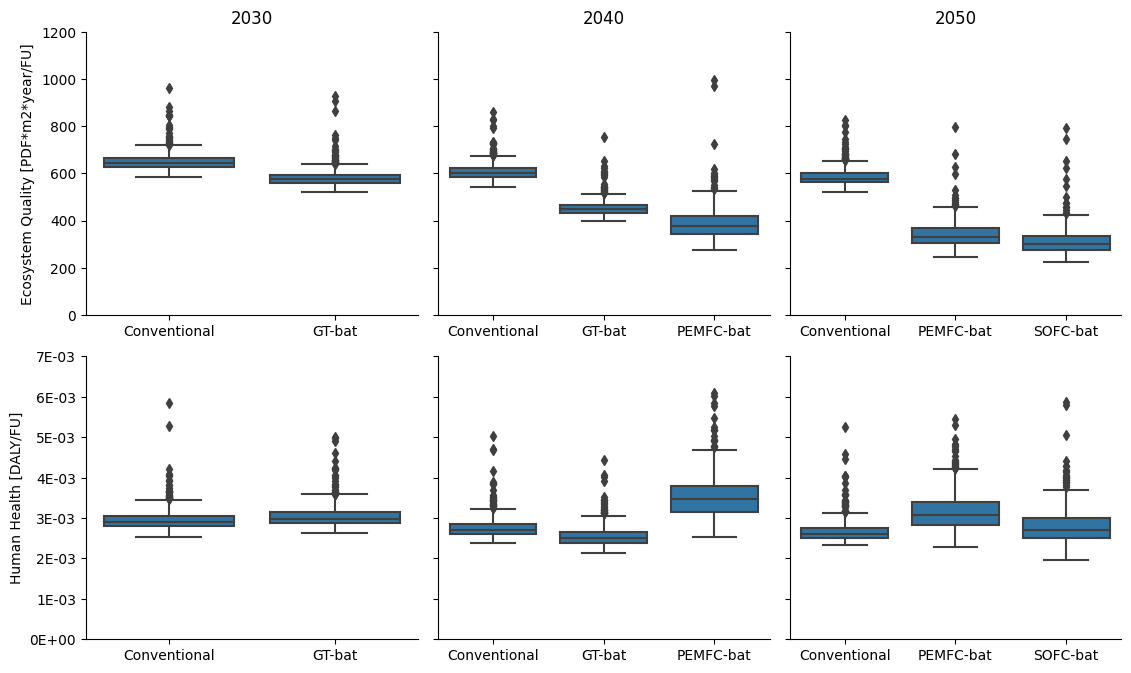

In [216]:
g=sns.catplot(endpoints_NDC_typical_kero_h2,x='Configuration',y='Value',row='Damage',col='Year',hue='Scenario',sharey='row',margin_titles=True, sharex=False,kind='box', units='Unit', height=3.5, aspect=1.1,legend=None)
g.set_axis_labels('', '') 
g.axes[0,0].set_ylabel("Ecosystem Quality [PDF*m2*year/FU]")
g.axes[0,0].set_title("2030")
g.axes[0,1].set_title("2040")
g.axes[0,2].set_title("2050")
g.axes[1,0].set_ylabel("Human Health [DALY/FU]")
g.axes[1,0].set_xlabel('')
g.axes[1,1].set_xlabel('')
g.axes[1,2].set_xlabel('')

#some outliers are excluded due to visibility considerations, the same figure with all outliers is presented in the supporting word file. To obtain that figure with all outliers the next two lines need to be outcommented.
g.axes[0,0].set_ylim(0, 1200)
g.axes[1,0].set_ylim(0, 0.007)


g.axes[1,0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))

for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text='')

plt.savefig("F2_boxplot_endpoint_NDC.svg", format='svg')
#plt.savefig("SI_F2_boxplot_endpoint_NDC.svg", format='svg')


### Figure 3 Contribution analysis on damage level  
(only for the endpoint baseline scenario and typical mission, no alternative aviation fuels are considered)

In [217]:
#Selecting only short-term damages (see method import section for more detail)
cols_HH_ST = ["Climate change, human health, short term",'Water availability, human health','Photochemical oxidant formation','Ionizing radiation, human health','Ozone layer depletion','Human toxicity cancer, short term','Human toxicity non-cancer, short term','Particulate matter formation']
cols_EQ_ST =['Climate change, ecosystem quality, short term','Marine acidification, short term','Land occupation, biodiversity','Water availability, freshwater ecosystem','Water availability, terrestrial ecosystem','Thermally polluted water','Freshwater ecotoxicity, short term','Freshwater acidification','Terrestrial acidification','Freshwater eutrophication','Marine eutrophication','Land transformation, biodiversity','Ionizing radiation, ecosystem quality']

deterministic_endpoint_2030_renamed=deterministic_endpoint_typ_2030.rename(index={'typ_aircraft_conv_kero_NDC': 'Conventional', 'typ_aircraft_GT_bat_kero_NDC': 'GT-bat'})
deterministic_endpoint_2040_renamed=deterministic_endpoint_typ_2040.rename(index={'typ_aircraft_conv_kero_NDC': 'Conventional', 'typ_aircraft_GT_bat_kero_NDC': 'GT-bat','typ_aircraft_PEMFC_bat_NDC': 'PEMFC-bat'})
deterministic_endpoint_2050_renamed=deterministic_endpoint_typ_2050[0].rename(index={'typ_aircraft_conv_kero_NDC': 'Conventional','typ_aircraft_PEMFC_bat_NDC': 'PEMFC-bat','typ_aircraft_SOFC_bat_NDC': 'SOFC-bat'})

endpoint_HH_2030_ST=deterministic_endpoint_2030_renamed[cols_HH_ST]
endpoint_EQ_2030_ST=deterministic_endpoint_2030_renamed[cols_EQ_ST]

endpoint_HH_2040_ST=deterministic_endpoint_2040_renamed[cols_HH_ST]
endpoint_EQ_2040_ST=deterministic_endpoint_2040_renamed[cols_EQ_ST]

endpoint_HH_2050_ST=deterministic_endpoint_2050_renamed[cols_HH_ST]
endpoint_EQ_2050_ST=deterministic_endpoint_2050_renamed[cols_EQ_ST]

configs_2030=['Conventional','GT-bat']
configs_2040=['Conventional','GT-bat','PEMFC-bat']
configs_2050=['Conventional','PEMFC-bat','SOFC-bat']

endpoint_HH_2030_ST_NDC=endpoint_HH_2030_ST.loc[configs_2030]
endpoint_EQ_2030_ST_NDC=endpoint_EQ_2030_ST.loc[configs_2030]
endpoint_HH_2040_ST_NDC=endpoint_HH_2040_ST.loc[configs_2040]
endpoint_EQ_2040_ST_NDC=endpoint_EQ_2040_ST.loc[configs_2040]
endpoint_HH_2050_ST_NDC=endpoint_HH_2050_ST.loc[configs_2050]
endpoint_EQ_2050_ST_NDC=endpoint_EQ_2050_ST.loc[configs_2050]

In [218]:
#setting color palette
palette=sns.color_palette('tab20')[:13]
sns.color_palette(palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

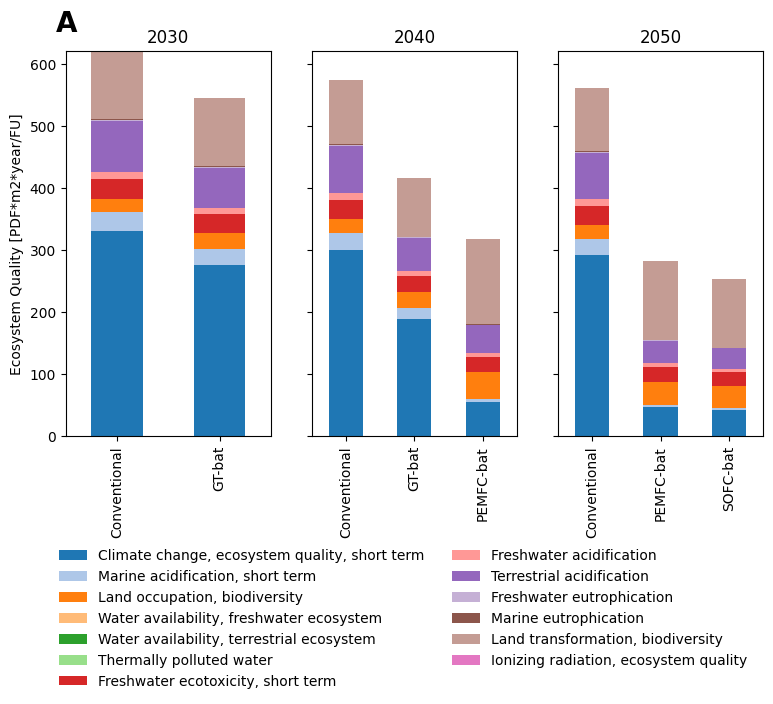

In [219]:
# create stacked bar chart for ecosystem quality

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9,5))

#add DataFrames to subplots
endpoint_EQ_2030_ST_NDC.plot(ax=axes[0],kind='bar', stacked=True, color=palette, fontsize=10, title='2030', legend=False)
endpoint_EQ_2040_ST_NDC.plot(ax=axes[1],kind='bar', stacked=True, color=palette, fontsize=10, title='2040',legend=False)
endpoint_EQ_2050_ST_NDC.plot(ax=axes[2],kind='bar', stacked=True, color=palette, fontsize=10, title='2050',legend=False)

handles, labels = axes[2].get_legend_handles_labels()
axes[0].set_ylabel('Ecosystem Quality [PDF*m2*year/FU]')
fig.legend(handles, labels,bbox_to_anchor=[1.15, 0.9],loc='upper center', frameon=False,fontsize=8)
sns.move_legend(fig, "lower center",bbox_to_anchor=(.5, -0.42), ncol=2,frameon=False)
axes[0].text(-0.05, 1.05, 'A', transform=axes[0].transAxes, size=20, weight='bold')

plt.savefig("F3A_contribution_damages_deterministic_EQ.svg", format='svg',bbox_inches='tight')

In [220]:
#setting color palette
alette=sns.color_palette('tab20')[:8]
sns.color_palette(palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

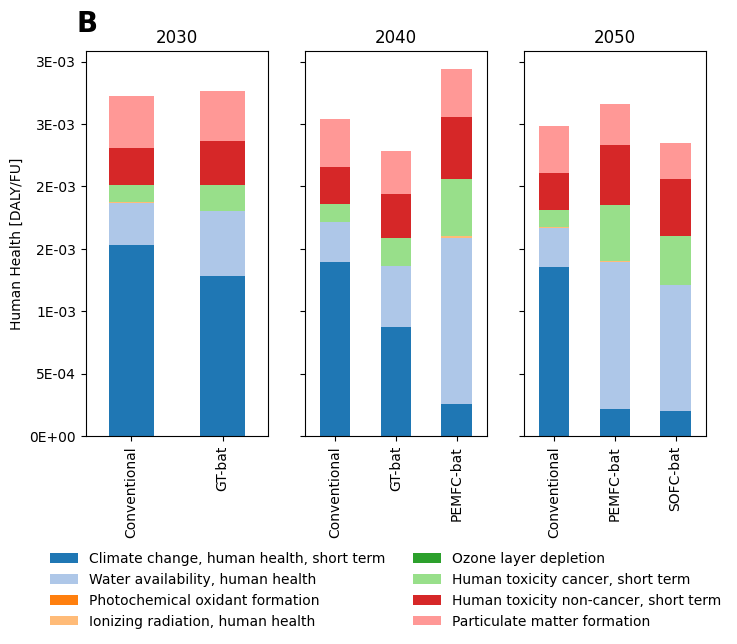

In [221]:
# create stacked bar chart for human health

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(8,5))

#add DataFrames to subplots
endpoint_HH_2030_ST_NDC.plot(ax=axes[0],kind='bar', stacked=True, color=palette, fontsize=10, title='2030', legend=False)
endpoint_HH_2040_ST_NDC.plot(ax=axes[1],kind='bar', stacked=True, color=palette, fontsize=10, title='2040',legend=False)
endpoint_HH_2050_ST_NDC.plot(ax=axes[2],kind='bar', stacked=True, color=palette, fontsize=10, title='2050',legend=False)

handles, labels = axes[2].get_legend_handles_labels()
axes[0].set_ylabel('Human Health [DALY/FU]')
fig.legend(handles, labels,bbox_to_anchor=[1.13, 0.9],loc='upper center',frameon=False)
sns.move_legend(fig, "lower center",bbox_to_anchor=(.5, -0.30), ncol=2,frameon=False)
axes[0].text(-0.05, 1.05, 'B', transform=axes[0].transAxes, size=20, weight='bold')
axes[0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))

plt.savefig("F3B_contribution_damages_deterministic_HH.svg", format='svg',bbox_inches='tight')

### Figure 4 Contribution Analysis: life cycle stages
based on deterministic results, obtained in 

In [222]:
#setting color palette
palette=sns.color_palette('tab20')[:6]
sns.color_palette(palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353)]

#### Human health

In [223]:
#merging all life cycle stages dataframes for human health damages into one

contributions_HH=pd.concat([endpoint_stages_contribution_HH_2030,endpoint_stages_contribution_HH_2040,endpoint_stages_contribution_HH_2050])
contributions_HH=contributions_HH[['Mission','Configuration','Fuel','Airport use','Aircraft production','SAF production', 'Combustion','Kerosene production','Electricity production','H2','Year']]
contributions_HH=contributions_HH.rename({'H2':'Hydrogen production'}, axis='columns')

#summing all impacts to obtain the human health damage
contributions_HH['Sum']=contributions_HH.sum(axis = 1, numeric_only=True)

In [224]:
#2030
contributions_HH_2030_kerosene_typ=contributions_HH[((contributions_HH['Configuration']=='Conventional')|(contributions_HH['Configuration']=='GT-bat'))&(contributions_HH['Fuel']=='Kerosene') & (contributions_HH['Mission'] =='typical mission')&(contributions_HH['Year'] =='2030')]
contributions_HH_2030_kerosene_typ=contributions_HH_2030_kerosene_typ.drop(columns=['SAF production'])
contributions_HH_2030_kerosene_typ=contributions_HH_2030_kerosene_typ.reindex([6,4])
#2040
contributions_HH_2040_kerosene_typ=contributions_HH[((contributions_HH['Configuration']=='Conventional')|(contributions_HH['Configuration']=='GT-bat')|(contributions_HH['Configuration']=='PEMFC-bat'))&(contributions_HH['Fuel']=='Kerosene') & (contributions_HH['Mission'] =='typical mission')&(contributions_HH['Year'] =='2040')]
contributions_HH_2040_kerosene_typ=contributions_HH_2040_kerosene_typ.drop(columns=['SAF production'])
contributions_HH_2040_kerosene_typ=contributions_HH_2040_kerosene_typ.reindex([8,5,7])
#2050
contributions_HH_2050_kerosene_typ=contributions_HH[((contributions_HH['Configuration']=='Conventional')|(contributions_HH['Configuration']=='SOFC-bat')|(contributions_HH['Configuration']=='PEMFC-bat'))&(contributions_HH['Fuel']=='Kerosene') & (contributions_HH['Mission'] =='typical mission')&(contributions_HH['Year'] =='2050')]
contributions_HH_2050_kerosene_typ=contributions_HH_2050_kerosene_typ.drop(columns=['SAF production'])
contributions_HH_2050_kerosene_typ=contributions_HH_2050_kerosene_typ.reindex([6,4,5])

In [225]:
# obtaining the contributions of each stage in percent
percentages_HH=contributions_HH
percentages_HH['Combustion %']=percentages_HH['Combustion']*100/percentages_HH['Sum']
percentages_HH['SAF production %']=percentages_HH['SAF production']*100/percentages_HH['Sum']
percentages_HH['Airport use %']=percentages_HH['Airport use']*100/percentages_HH['Sum']
percentages_HH['Kerosene production %']=percentages_HH['Kerosene production']*100/percentages_HH['Sum']
percentages_HH['Electricity production %']=percentages_HH['Electricity production']*100/percentages_HH['Sum']
percentages_HH['Aircraft production %']=percentages_HH['Aircraft production']*100/percentages_HH['Sum']
percentages_HH['Hydrogen production %']=percentages_HH['Hydrogen production']*100/percentages_HH['Sum']
percentages_HH=percentages_HH.drop(columns=['Combustion','SAF production','Airport use','Kerosene production','Electricity production','Aircraft production','Hydrogen production','Sum'])

#2030
percentages_HH_2030_kerosene_typ=percentages_HH[((percentages_HH['Configuration']=='Conventional')|(percentages_HH['Configuration']=='GT-bat'))&(percentages_HH['Fuel']=='Kerosene') & (percentages_HH['Mission'] =='typical mission')&(percentages_HH['Year'] =='2030')]
percentages_HH_2030_kerosene_typ=percentages_HH_2030_kerosene_typ.reindex([6,4])

#2040
percentages_HH_2040_kerosene_typ=percentages_HH[((percentages_HH['Configuration']=='Conventional')|(percentages_HH['Configuration']=='GT-bat')|(percentages_HH['Configuration']=='PEMFC-bat'))&(percentages_HH['Fuel']=='Kerosene') & (percentages_HH['Mission'] =='typical mission')&(percentages_HH['Year'] =='2040')]
percentages_HH_2040_kerosene_typ=percentages_HH_2040_kerosene_typ.reindex([8,5,7])

#2050
percentages_HH_2050_kerosene_typ=percentages_HH[((percentages_HH['Configuration']=='Conventional')|(percentages_HH['Configuration']=='SOFC-bat')|(percentages_HH['Configuration']=='PEMFC-bat'))&(percentages_HH['Fuel']=='Kerosene') & (percentages_HH['Mission'] =='typical mission')&(percentages_HH['Year'] =='2050')]
percentages_HH_2050_kerosene_typ=percentages_HH_2050_kerosene_typ.reindex([6,4,5])


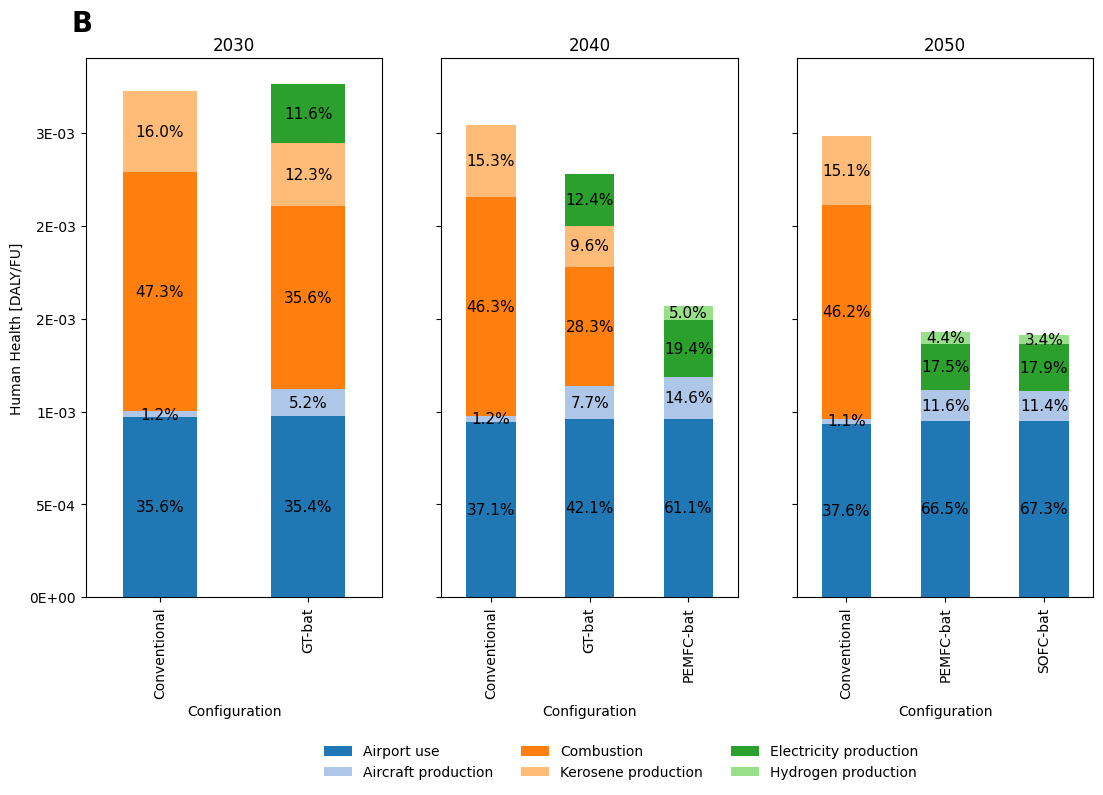

In [226]:
#creating barplot with stacked absolute values
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(13, 7))

contributions_HH_2030_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[0], legend=False, title='2030', color=palette)
contributions_HH_2040_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[1], legend=False, title='2040', color=palette)
contributions_HH_2050_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[2], legend=False, title='2050', color=palette)

axes[0].set_ylabel(r'Human Health [DALY/FU]')
plt.legend(loc='center left', bbox_to_anchor=(0.255, 0.85))
axes[0].text(-0.05, 1.05, 'B', transform=axes[0].transAxes, size=20, weight='bold')


#adding the corresponding percentages onto the graph manually
# Airport Use 2030
for xpos, ypos, yval in zip([0,1],((contributions_HH_2030_kerosene_typ['Airport use'])/2).values, percentages_HH_2030_kerosene_typ['Airport use %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
# Airport Use 2040
for xpos, ypos, yval in zip([0,1,2],((contributions_HH_2040_kerosene_typ['Airport use'])/2).values, percentages_HH_2040_kerosene_typ['Airport use %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
# Airport Use 2050
for xpos, ypos, yval in zip([0,1,2],((contributions_HH_2050_kerosene_typ['Airport use'])/2).values, percentages_HH_2050_kerosene_typ['Airport use %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')

#Aircraft production 2030
for xpos, ypos, yval in zip([0,1],(contributions_HH_2030_kerosene_typ['Airport use']+(contributions_HH_2030_kerosene_typ['Aircraft production']/2)).values, percentages_HH_2030_kerosene_typ['Aircraft production %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
#Aircraft production 2040
for xpos, ypos, yval in zip([0,1,2],(contributions_HH_2040_kerosene_typ['Airport use']+(contributions_HH_2040_kerosene_typ['Aircraft production']/2)).values, percentages_HH_2040_kerosene_typ['Aircraft production %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')  
#Aircraft production 2050
for xpos, ypos, yval in zip([0,1,2],(contributions_HH_2050_kerosene_typ['Airport use']+(contributions_HH_2050_kerosene_typ['Aircraft production']/2)).values, percentages_HH_2050_kerosene_typ['Aircraft production %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
      
#Combustion 2030
for xpos, ypos, yval in zip([0,1],(contributions_HH_2030_kerosene_typ['Airport use']+contributions_HH_2030_kerosene_typ['Aircraft production']+(contributions_HH_2030_kerosene_typ['Combustion']/2)).values, percentages_HH_2030_kerosene_typ['Combustion %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Combustion 2040
for xpos, ypos, yval in zip([0,1],(contributions_HH_2040_kerosene_typ['Airport use']+contributions_HH_2040_kerosene_typ['Aircraft production']+(contributions_HH_2040_kerosene_typ['Combustion']/2)).values, percentages_HH_2040_kerosene_typ['Combustion %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
#Combustion 2050
for xpos, ypos, yval in zip([0],(contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+(contributions_HH_2050_kerosene_typ['Combustion']/2)).values, percentages_HH_2050_kerosene_typ['Combustion %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')

#Kerosene production 2030
for xpos, ypos, yval in zip([0,1],(contributions_HH_2030_kerosene_typ['Airport use']+contributions_HH_2030_kerosene_typ['Aircraft production']+contributions_HH_2030_kerosene_typ['Combustion']+(contributions_HH_2030_kerosene_typ['Kerosene production']/2)).values, percentages_HH_2030_kerosene_typ['Kerosene production %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Kerosene production 2040
for xpos, ypos, yval in zip([0,1],(contributions_HH_2040_kerosene_typ['Airport use']+contributions_HH_2040_kerosene_typ['Aircraft production']+contributions_HH_2040_kerosene_typ['Combustion']+(contributions_HH_2040_kerosene_typ['Kerosene production']/2)).values, percentages_HH_2040_kerosene_typ['Kerosene production %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Kerosene production 2050
for xpos, ypos, yval in zip([0],(contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+contributions_HH_2050_kerosene_typ['Combustion']+(contributions_HH_2050_kerosene_typ['Kerosene production']/2)).values, percentages_HH_2050_kerosene_typ['Kerosene production %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')     
    
#Electricity production 2030
axes[0].text(1, (contributions_HH_2030_kerosene_typ['Airport use']+contributions_HH_2030_kerosene_typ['Aircraft production']+contributions_HH_2030_kerosene_typ['Combustion']+contributions_HH_2030_kerosene_typ['Kerosene production']+(contributions_HH_2030_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_HH_2030_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
#Electricity production 2040
axes[1].text(1, (contributions_HH_2040_kerosene_typ['Airport use']+contributions_HH_2040_kerosene_typ['Aircraft production']+contributions_HH_2040_kerosene_typ['Combustion']+contributions_HH_2040_kerosene_typ['Kerosene production']+(contributions_HH_2040_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_HH_2040_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
axes[1].text(2, (contributions_HH_2040_kerosene_typ['Airport use']+contributions_HH_2040_kerosene_typ['Aircraft production']+contributions_HH_2040_kerosene_typ['Combustion']+contributions_HH_2040_kerosene_typ['Kerosene production']+(contributions_HH_2040_kerosene_typ['Electricity production']/2)).values[2], f"{percentages_HH_2040_kerosene_typ['Electricity production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')
#Electricity production 2050
axes[2].text(1, (contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+contributions_HH_2050_kerosene_typ['Combustion']+contributions_HH_2050_kerosene_typ['Kerosene production']+(contributions_HH_2050_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_HH_2050_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
axes[2].text(2, (contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+contributions_HH_2050_kerosene_typ['Combustion']+contributions_HH_2050_kerosene_typ['Kerosene production']+(contributions_HH_2050_kerosene_typ['Electricity production']/2)).values[2], f"{percentages_HH_2050_kerosene_typ['Electricity production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')

#Hydrogen production production 2040
axes[1].text(2,(contributions_HH_2040_kerosene_typ['Airport use']+contributions_HH_2040_kerosene_typ['Aircraft production']+contributions_HH_2040_kerosene_typ['Combustion']+contributions_HH_2040_kerosene_typ['Kerosene production']+contributions_HH_2040_kerosene_typ['Electricity production']+(contributions_HH_2040_kerosene_typ['Hydrogen production']/2)).values[2], f"{percentages_HH_2040_kerosene_typ['Hydrogen production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')
#Hydrogen production production 2050
axes[2].text(1,(contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+contributions_HH_2050_kerosene_typ['Combustion']+contributions_HH_2050_kerosene_typ['Kerosene production']+contributions_HH_2050_kerosene_typ['Electricity production']+(contributions_HH_2050_kerosene_typ['Hydrogen production']/2)).values[1], f"{percentages_HH_2050_kerosene_typ['Hydrogen production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
#Hydrogen production production 2040
axes[2].text(2,(contributions_HH_2050_kerosene_typ['Airport use']+contributions_HH_2050_kerosene_typ['Aircraft production']+contributions_HH_2050_kerosene_typ['Combustion']+contributions_HH_2050_kerosene_typ['Kerosene production']+contributions_HH_2050_kerosene_typ['Electricity production']+(contributions_HH_2050_kerosene_typ['Hydrogen production']/2)).values[2], f"{percentages_HH_2050_kerosene_typ['Hydrogen production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')

axes[0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))
plt.legend(bbox_to_anchor=(0.45, -0.25), ncol=3,frameon=False)

plt.savefig("F4B_contribution_stages_deterministic_NDC_HH.svg", format='svg',bbox_inches='tight')

#### Ecosystem Quality

In [227]:
#merging all life cycle stages dataframes for ecosystem quality damages into one

contributions_EQ=pd.concat([endpoint_stages_contribution_EQ_2030,endpoint_stages_contribution_EQ_2040,endpoint_stages_contribution_EQ_2050])
contributions_EQ=contributions_EQ[['Mission','Configuration','Fuel','Airport use','Aircraft production','SAF production', 'Combustion','Kerosene production','Electricity production','H2','Year']]
contributions_EQ=contributions_EQ.rename({'H2':'Hydrogen production'}, axis='columns')

#summing all damages to obtain the ecosystem quality value
contributions_EQ['Sum']=contributions_EQ.sum(axis = 1, numeric_only=True)


In [228]:
#2030
contributions_EQ_2030_kerosene_typ=contributions_EQ[((contributions_EQ['Configuration']=='Conventional')|(contributions_EQ['Configuration']=='GT-bat'))&(contributions_EQ['Fuel']=='Kerosene') & (contributions_EQ['Mission'] =='typical mission')&(contributions_EQ['Year'] =='2030')]
contributions_EQ_2030_kerosene_typ=contributions_EQ_2030_kerosene_typ.drop(columns=['SAF production'])
contributions_EQ_2030_kerosene_typ=contributions_EQ_2030_kerosene_typ.reindex([6,4])
#2040
contributions_EQ_2040_kerosene_typ=contributions_EQ[((contributions_EQ['Configuration']=='Conventional')|(contributions_EQ['Configuration']=='GT-bat')|(contributions_EQ['Configuration']=='PEMFC-bat'))&(contributions_EQ['Fuel']=='Kerosene') & (contributions_EQ['Mission'] =='typical mission')&(contributions_EQ['Year'] =='2040')]
contributions_EQ_2040_kerosene_typ=contributions_EQ_2040_kerosene_typ.drop(columns=['SAF production'])
contributions_EQ_2040_kerosene_typ=contributions_EQ_2040_kerosene_typ.reindex([8,5,7])
#2050
contributions_EQ_2050_kerosene_typ=contributions_EQ[((contributions_EQ['Configuration']=='Conventional')|(contributions_EQ['Configuration']=='SOFC-bat')|(contributions_EQ['Configuration']=='PEMFC-bat'))&(contributions_EQ['Fuel']=='Kerosene') & (contributions_EQ['Mission'] =='typical mission')&(contributions_EQ['Year'] =='2050')]
contributions_EQ_2050_kerosene_typ=contributions_EQ_2050_kerosene_typ.drop(columns=['SAF production'])
contributions_EQ_2050_kerosene_typ=contributions_EQ_2050_kerosene_typ.reindex([6,4,5])

In [229]:
# obtaining the contributions of each stage in percent
percentages_EQ=contributions_EQ
percentages_EQ['Combustion %']=percentages_EQ['Combustion']*100/percentages_EQ['Sum']
percentages_EQ['SAF production %']=percentages_EQ['SAF production']*100/percentages_EQ['Sum']
percentages_EQ['Airport use %']=percentages_EQ['Airport use']*100/percentages_EQ['Sum']
percentages_EQ['Kerosene production %']=percentages_EQ['Kerosene production']*100/percentages_EQ['Sum']
percentages_EQ['Electricity production %']=percentages_EQ['Electricity production']*100/percentages_EQ['Sum']
percentages_EQ['Aircraft production %']=percentages_EQ['Aircraft production']*100/percentages_EQ['Sum']
percentages_EQ['Hydrogen production %']=percentages_EQ['Hydrogen production']*100/percentages_EQ['Sum']
percentages_EQ=percentages_EQ.drop(columns=['Combustion','SAF production','Airport use','Kerosene production','Electricity production','Aircraft production','Hydrogen production','Sum'])

#2030
percentages_EQ_2030_kerosene_typ=percentages_EQ[((percentages_EQ['Configuration']=='Conventional')|(percentages_EQ['Configuration']=='GT-bat'))&(percentages_EQ['Fuel']=='Kerosene') & (percentages_EQ['Mission'] =='typical mission')&(percentages_EQ['Year'] =='2030')]
percentages_EQ_2030_kerosene_typ=percentages_EQ_2030_kerosene_typ.reindex([6,4])

#2040
percentages_EQ_2040_kerosene_typ=percentages_EQ[((percentages_EQ['Configuration']=='Conventional')|(percentages_EQ['Configuration']=='GT-bat')|(percentages_EQ['Configuration']=='PEMFC-bat'))&(percentages_EQ['Fuel']=='Kerosene') & (percentages_EQ['Mission'] =='typical mission')&(percentages_EQ['Year'] =='2040')]
percentages_EQ_2040_kerosene_typ=percentages_EQ_2040_kerosene_typ.reindex([8,5,7])

#2050
percentages_EQ_2050_kerosene_typ=percentages_EQ[((percentages_EQ['Configuration']=='Conventional')|(percentages_EQ['Configuration']=='SOFC-bat')|(percentages_EQ['Configuration']=='PEMFC-bat'))&(percentages_EQ['Fuel']=='Kerosene') & (percentages_EQ['Mission'] =='typical mission')&(percentages_EQ['Year'] =='2050')]
percentages_EQ_2050_kerosene_typ=percentages_EQ_2050_kerosene_typ.reindex([6,4,5])


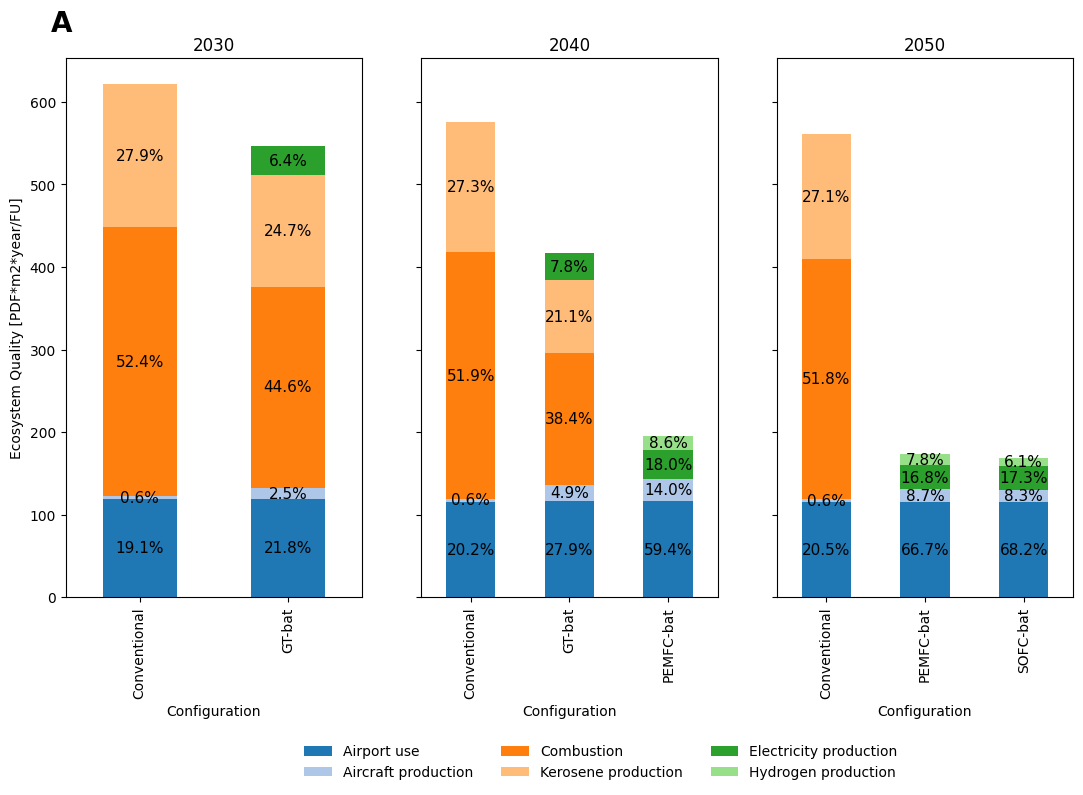

In [230]:
#creating barplot with stacked absolute values
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(13, 7))

contributions_EQ_2030_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[0], legend=False, title='2030', color=palette)
contributions_EQ_2040_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[1], legend=False, title='2040', color=palette)
contributions_EQ_2050_kerosene_typ.drop(columns=['Sum']).plot(kind='bar', x='Configuration', stacked=True, ax=axes[2], legend=False, title='2050', color=palette)

axes[0].set_ylabel(r'Ecosystem Quality [PDF*m2*year/FU]')
plt.legend(loc='center left', bbox_to_anchor=(0.255, 0.85))
axes[0].text(-0.05, 1.05, 'A', transform=axes[0].transAxes, size=20, weight='bold')


#adding the corresponding percentages onto the graph manually
# Airport Use 2030
for xpos, ypos, yval in zip([0,1],((contributions_EQ_2030_kerosene_typ['Airport use'])/2).values, percentages_EQ_2030_kerosene_typ['Airport use %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
# Airport Use 2040
for xpos, ypos, yval in zip([0,1,2],((contributions_EQ_2040_kerosene_typ['Airport use'])/2).values, percentages_EQ_2040_kerosene_typ['Airport use %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
# Airport Use 2050
for xpos, ypos, yval in zip([0,1,2],((contributions_EQ_2050_kerosene_typ['Airport use'])/2).values, percentages_EQ_2050_kerosene_typ['Airport use %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')

#Aircraft production 2030
for xpos, ypos, yval in zip([0,1],(contributions_EQ_2030_kerosene_typ['Airport use']+(contributions_EQ_2030_kerosene_typ['Aircraft production']/2)).values, percentages_EQ_2030_kerosene_typ['Aircraft production %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
#Aircraft production 2040
for xpos, ypos, yval in zip([0,1,2],(contributions_EQ_2040_kerosene_typ['Airport use']+(contributions_EQ_2040_kerosene_typ['Aircraft production']/2)).values, percentages_EQ_2040_kerosene_typ['Aircraft production %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')  
#Aircraft production 2050
for xpos, ypos, yval in zip([0,1,2],(contributions_EQ_2050_kerosene_typ['Airport use']+(contributions_EQ_2050_kerosene_typ['Aircraft production']/2)).values, percentages_EQ_2050_kerosene_typ['Aircraft production %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
      
#Combustion 2030
for xpos, ypos, yval in zip([0,1],(contributions_EQ_2030_kerosene_typ['Airport use']+contributions_EQ_2030_kerosene_typ['Aircraft production']+(contributions_EQ_2030_kerosene_typ['Combustion']/2)).values, percentages_EQ_2030_kerosene_typ['Combustion %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Combustion 2040
for xpos, ypos, yval in zip([0,1],(contributions_EQ_2040_kerosene_typ['Airport use']+contributions_EQ_2040_kerosene_typ['Aircraft production']+(contributions_EQ_2040_kerosene_typ['Combustion']/2)).values, percentages_EQ_2040_kerosene_typ['Combustion %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')
#Combustion 2050
for xpos, ypos, yval in zip([0],(contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+(contributions_EQ_2050_kerosene_typ['Combustion']/2)).values, percentages_EQ_2050_kerosene_typ['Combustion %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')

#Kerosene production 2030
for xpos, ypos, yval in zip([0,1],(contributions_EQ_2030_kerosene_typ['Airport use']+contributions_EQ_2030_kerosene_typ['Aircraft production']+contributions_EQ_2030_kerosene_typ['Combustion']+(contributions_EQ_2030_kerosene_typ['Kerosene production']/2)).values, percentages_EQ_2030_kerosene_typ['Kerosene production %'].values):
    axes[0].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Kerosene production 2040
for xpos, ypos, yval in zip([0,1],(contributions_EQ_2040_kerosene_typ['Airport use']+contributions_EQ_2040_kerosene_typ['Aircraft production']+contributions_EQ_2040_kerosene_typ['Combustion']+(contributions_EQ_2040_kerosene_typ['Kerosene production']/2)).values, percentages_EQ_2040_kerosene_typ['Kerosene production %'].values):
    axes[1].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11') 
#Kerosene production 2050
for xpos, ypos, yval in zip([0],(contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+contributions_EQ_2050_kerosene_typ['Combustion']+(contributions_EQ_2050_kerosene_typ['Kerosene production']/2)).values, percentages_EQ_2050_kerosene_typ['Kerosene production %'].values):
    axes[2].text(xpos, ypos, f"{yval:0.1f}%", ha="center", va="center",fontsize='11')     
    
#Electricity production 2030
axes[0].text(1, (contributions_EQ_2030_kerosene_typ['Airport use']+contributions_EQ_2030_kerosene_typ['Aircraft production']+contributions_EQ_2030_kerosene_typ['Combustion']+contributions_EQ_2030_kerosene_typ['Kerosene production']+(contributions_EQ_2030_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_EQ_2030_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
#Electricity production 2040
axes[1].text(1, (contributions_EQ_2040_kerosene_typ['Airport use']+contributions_EQ_2040_kerosene_typ['Aircraft production']+contributions_EQ_2040_kerosene_typ['Combustion']+contributions_EQ_2040_kerosene_typ['Kerosene production']+(contributions_EQ_2040_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_EQ_2040_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
axes[1].text(2, (contributions_EQ_2040_kerosene_typ['Airport use']+contributions_EQ_2040_kerosene_typ['Aircraft production']+contributions_EQ_2040_kerosene_typ['Combustion']+contributions_EQ_2040_kerosene_typ['Kerosene production']+(contributions_EQ_2040_kerosene_typ['Electricity production']/2)).values[2], f"{percentages_EQ_2040_kerosene_typ['Electricity production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')
#Electricity production 2050
axes[2].text(1, (contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+contributions_EQ_2050_kerosene_typ['Combustion']+contributions_EQ_2050_kerosene_typ['Kerosene production']+(contributions_EQ_2050_kerosene_typ['Electricity production']/2)).values[1], f"{percentages_EQ_2050_kerosene_typ['Electricity production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
axes[2].text(2, (contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+contributions_EQ_2050_kerosene_typ['Combustion']+contributions_EQ_2050_kerosene_typ['Kerosene production']+(contributions_EQ_2050_kerosene_typ['Electricity production']/2)).values[2], f"{percentages_EQ_2050_kerosene_typ['Electricity production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')

#Hydrogen production production 2040
axes[1].text(2,(contributions_EQ_2040_kerosene_typ['Airport use']+contributions_EQ_2040_kerosene_typ['Aircraft production']+contributions_EQ_2040_kerosene_typ['Combustion']+contributions_EQ_2040_kerosene_typ['Kerosene production']+contributions_EQ_2040_kerosene_typ['Electricity production']+(contributions_EQ_2040_kerosene_typ['Hydrogen production']/2)).values[2], f"{percentages_EQ_2040_kerosene_typ['Hydrogen production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')
#Hydrogen production production 2050
axes[2].text(1,(contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+contributions_EQ_2050_kerosene_typ['Combustion']+contributions_EQ_2050_kerosene_typ['Kerosene production']+contributions_EQ_2050_kerosene_typ['Electricity production']+(contributions_EQ_2050_kerosene_typ['Hydrogen production']/2)).values[1], f"{percentages_EQ_2050_kerosene_typ['Hydrogen production %'].values[1]:0.1f}%", ha="center", va="center",fontsize='11')
#Hydrogen production production 2040
axes[2].text(2,(contributions_EQ_2050_kerosene_typ['Airport use']+contributions_EQ_2050_kerosene_typ['Aircraft production']+contributions_EQ_2050_kerosene_typ['Combustion']+contributions_EQ_2050_kerosene_typ['Kerosene production']+contributions_EQ_2050_kerosene_typ['Electricity production']+(contributions_EQ_2050_kerosene_typ['Hydrogen production']/2)).values[2], f"{percentages_EQ_2050_kerosene_typ['Hydrogen production %'].values[2]:0.1f}%", ha="center", va="center",fontsize='11')


plt.legend(bbox_to_anchor=(0.45, -0.25), ncol=3,frameon=False)
plt.savefig("F4A_contribution_stages_deterministic_NDC_EQ.svg", format='svg',bbox_inches='tight')

### Figure 5 Comparison of SSP scenarios
only for the typical mission endpoints, without consideration for alternative aviation fuels

In [231]:
endpoints_ST_typical=endpoints_ST[endpoints_ST['Mission']=='Typical']
endpoints_ST_typical_h2_kero=endpoints_ST_typical[(endpoints_ST_typical["Fuel"] != "AAF") & (endpoints_ST_typical["Fuel"] != "ILUC")]

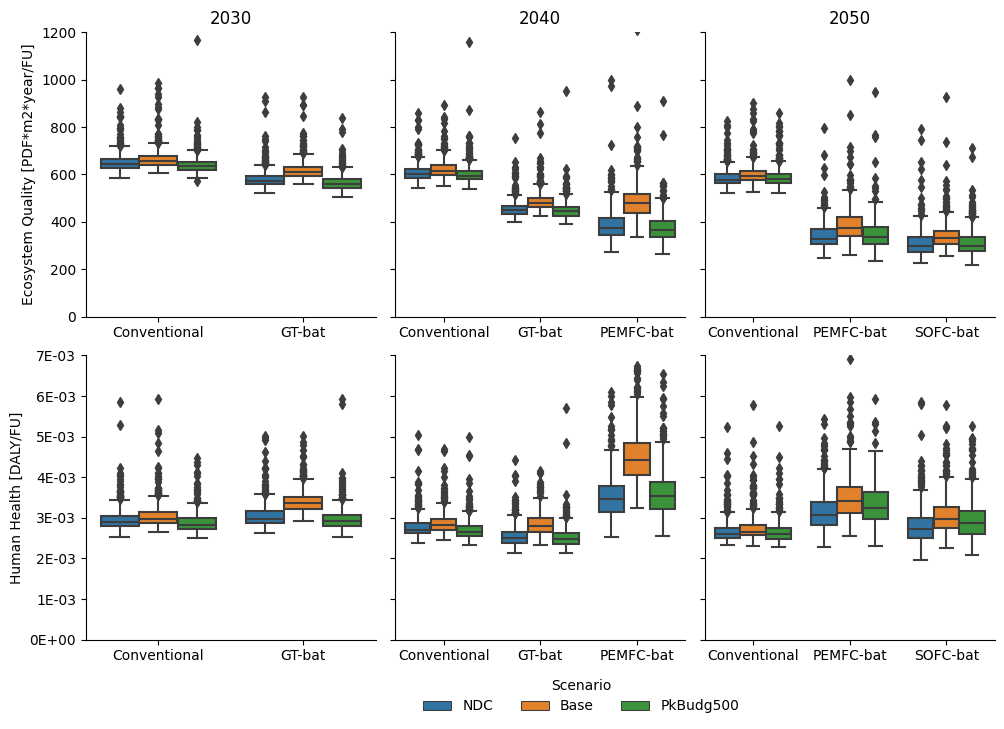

In [232]:
g=sns.catplot(endpoints_ST_typical_h2_kero,x='Configuration',y='Value',row='Damage',col='Year',hue='Scenario',sharey='row',margin_titles=True, sharex=False,kind='box', units='Unit', height=3.5, aspect=1)
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, -0.04), ncol=4,frameon=False)
g.axes[0,0].set_ylabel("Ecosystem Quality [PDF*m2*year/FU]")
g.axes[1,0].set_ylabel("Human Health [DALY/FU]")
g.axes[0,0].set_title("2030")
g.axes[0,1].set_title("2040")
g.axes[0,2].set_title("2050")
g.axes[1,0].set_xlabel('')
g.axes[1,1].set_xlabel('')
g.axes[1,2].set_xlabel('')

#some outliers are excluded due to visibility considerations, the same figure with all outliers is presented in the supporting word file. To obtain that figure with all outliers the next two lines need to be outcommented.
g.axes[0,0].set_ylim(0, 1200)
g.axes[1,0].set_ylim(0, 0.007)
g.axes[1,0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))

for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text='')

plt.savefig("F5_boxplot_endpoint_scenarios_noAAF.svg", format='svg',bbox_inches='tight')
#plt.savefig("SI_F5_boxplot_endpoint_scenarios_noAAF.svg", format='svg',bbox_inches='tight')


### Figure 6 Comparison of different fuels
Comparison of kerosene, AAF and AAF+ILUC use as fuels. Only for the endpoint, typical mission and the baseline scenario.

In [233]:
endpoints_NDC=endpoints_ST[endpoints_ST['Scenario']=='NDC']
endpoints_NDC_typical=endpoints_NDC[endpoints_NDC['Mission']=='Typical']
endpoints_NDC_typical=endpoints_NDC_typical.replace(['H2'],'Hydrogen')
endpoints_NDC_typical=endpoints_NDC_typical.replace(['ILUC'],'AAF+ILUC')

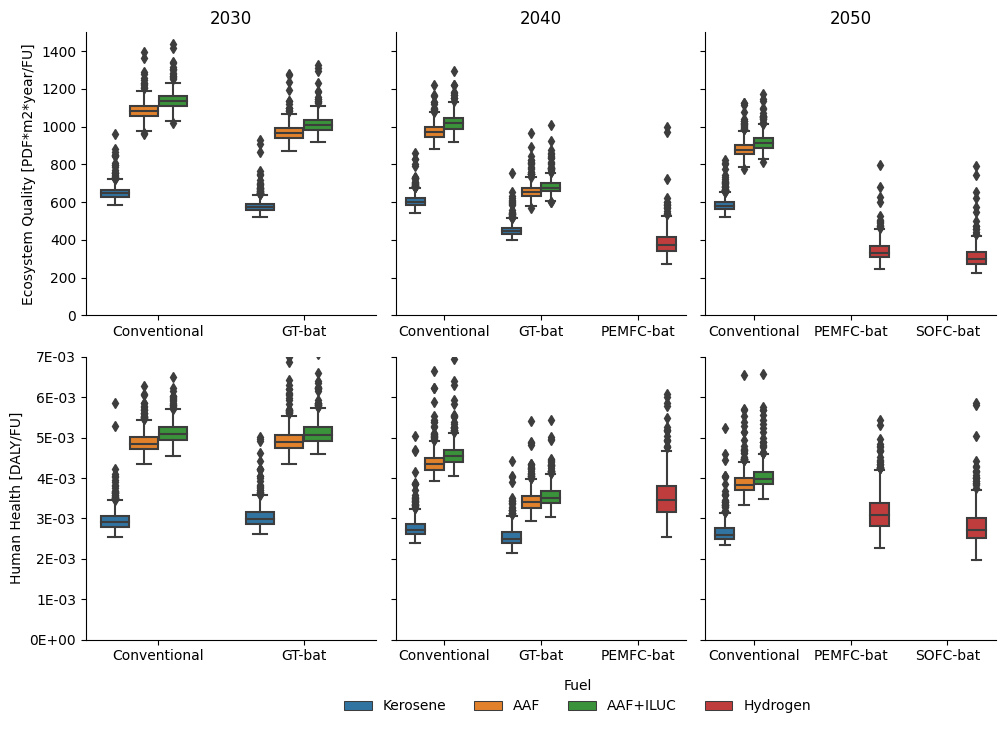

In [234]:
g=sns.catplot(endpoints_NDC_typical,x='Configuration',y='Value',row='Damage',col='Year',hue='Fuel',sharey='row',margin_titles=True, sharex=False,kind='box', units='Unit', height=3.5, aspect=1,dodge=True)
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, -0.04), ncol=4,frameon=False)
g.axes[0,0].set_ylabel("Ecosystem Quality [PDF*m2*year/FU]")
g.axes[1,0].set_ylabel("Human Health [DALY/FU]")
g.axes[0,0].set_title("2030")
g.axes[0,1].set_title("2040")
g.axes[0,2].set_title("2050")
g.axes[1,0].set_xlabel('')
g.axes[1,1].set_xlabel('')
g.axes[1,2].set_xlabel('')


#some outliers are excluded due to visibility considerations, the same figure with all outliers is presented in the supporting word file. To obtain that figure with all outliers the next two lines need to be outcommented.
g.axes[0,0].set_ylim(0, 1500)
g.axes[1,0].set_ylim(0, 0.007)
g.axes[1,0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))
for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text='')
    
plt.savefig("F6_boxplot_endpoint_NDC_AAFs.svg", format='svg',bbox_inches='tight')
#plt.savefig("SI_F6_boxplot_endpoint_NDC_AAFs.svg", format='svg',bbox_inches='tight')

### Appendix Figure: typical mission vs. design mission
Only for the endpoint baseline scenario with no consideration for alternative aviation fuels

In [235]:
endpoints_NDC=endpoints_ST[endpoints_ST['Scenario']=='NDC']
endpoints_NDC_kero_h2=endpoints_NDC[(endpoints_NDC["Fuel"] != "AAF") & (endpoints_NDC["Fuel"] != "ILUC")]


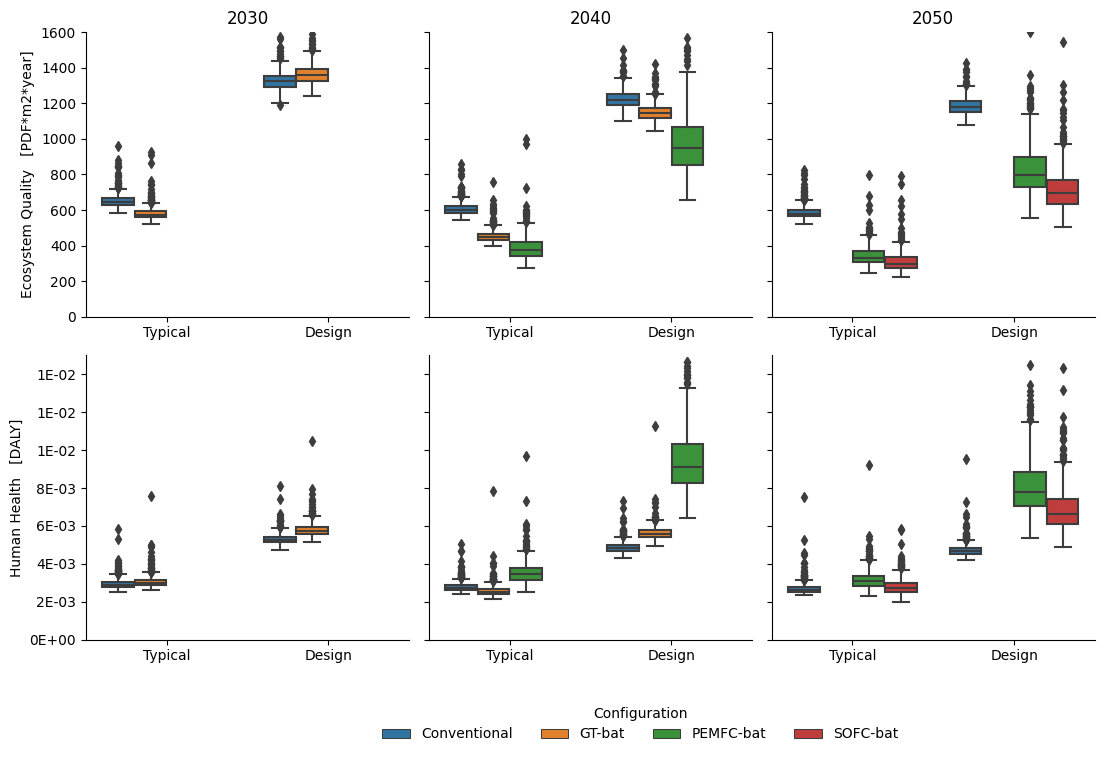

In [236]:
g=sns.catplot(endpoints_NDC_kero_h2,x='Mission',y='Value',row='Damage',col='Year',hue='Configuration',sharey='row',margin_titles=True, sharex=False,kind='box', units='Unit', height=3.5, aspect=1.1)
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, -0.08), ncol=4,frameon=False)
g.axes[0,0].set_ylabel("Ecosystem Quality   [PDF*m2*year]")
g.axes[1,0].set_ylabel("Human Health   [DALY]")
g.axes[1,0].set_xlabel('')
g.axes[1,1].set_xlabel('')
g.axes[1,2].set_xlabel('')
g.axes[0,0].set_title("2030")
g.axes[0,1].set_title("2040")
g.axes[0,2].set_title("2050")
#zooming in on the y axis - outliers!
g.axes[0,0].set_ylim(0, 1600)
g.axes[1,0].set_ylim(0, 0.015)
g.axes[1,0].yaxis.set_major_formatter(lambda x, pos: "{:.0E}".format(x))
for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text='')
plt.savefig("SI_boxplot_endpoint_missions_NDC_noAAF.svg", format='svg',bbox_inches='tight')


### Appendix figure: comparison of SSP scenarios
Boxplots with midpoint results for the typical mission, with no consideration for alternative aviation fuels

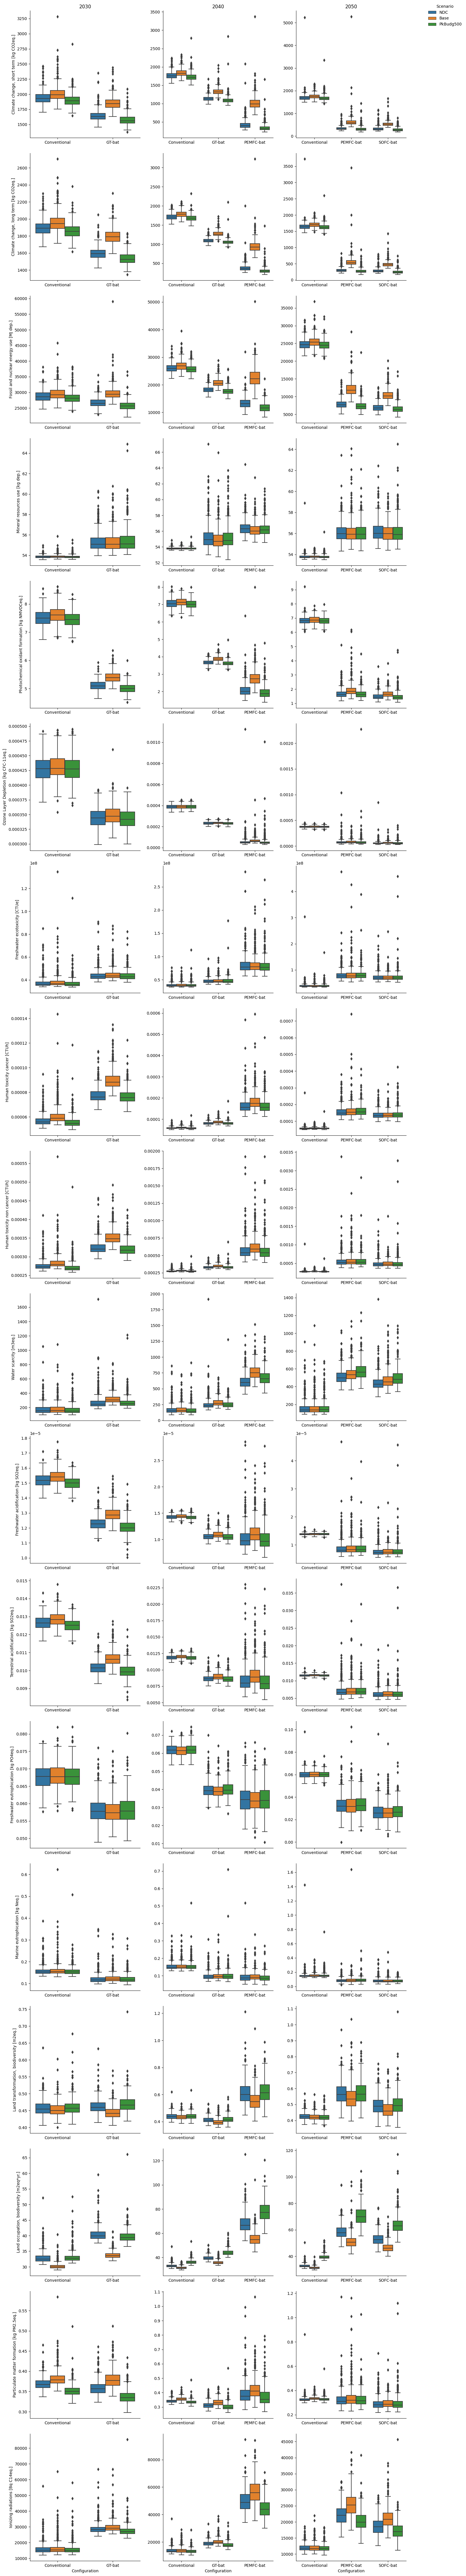

In [237]:
#endpoint for all ssp scenarios (only kerosene and h2)
MC_results_kero_h2=MC_results_Midpoint[(MC_results_Midpoint["Fuel"] != "AAF") & (MC_results_Midpoint["Fuel"] != "ILUC")&(MC_results_Midpoint["Mission"] == "Typical")]
j=sns.catplot(MC_results_kero_h2,x='Configuration',y='Value',row='Category',col='Year',hue='Scenario',sharey=False, sharex=False,kind='box',margin_titles=True, units='Unit')
sns.move_legend(j, "upper left", bbox_to_anchor=(0.92,1))


for i in range(len(units_IWP_mid)):
    j.axes[i,0].set_ylabel(IWP_mid[i][1]+" ["+units_IWP_mid[i]+"]")
    
j.axes[0,0].set_title("2030")
j.axes[0,1].set_title("2040")
j.axes[0,2].set_title("2050")
for i, ax in enumerate(j.axes.flat):
    plt.setp(ax.texts, text='')
plt.savefig("SI_boxplot_endpoint_scenarios_noAAF.svg", format='svg',bbox_inches='tight')
